<img src="https://github.com/akthammomani/akthammomani/assets/67468718/8d1f93b4-2270-477b-bd76-f9ec1c075307" width="1700"/>

# Exploratory Data Analysis: AI-Powered Heart Disease Risk Assessment

* **Name:** Aktham Almomani
* **Course:** Probability and Statistics for Artificial Intelligence (MS-AAI-500-02) / University Of San Diego
* **Semester:** Summer 2024
* **Group:** 8



<center>
    <img src="https://github.com/akthammomani/AI_powered_heart_disease_risk_assessment_app/assets/67468718/7964de28-7421-4718-a3b3-d5ff125d7468" alt="EDA">
</center>


## **Contents**<a is='Contents'></a>
* [Introduction](#Introduction)
* [Dataset](#Dataset)
* [Setup and Preliminaries](#Setup_and_preliminaries)
  * [Import Libraries](#Import_libraries)
  * [Necessary Functions](#Necessary_Functions)
* [Importing dataset](#Importing_dataset)
* [Validating the dataset](#Validating_the_dataset)
* [Heart Disease related features](#Heart_Disease_related_features)
* [Converting features data type](#Converting_features_data_type)
* [Analyzing categorical feature distributions against a target variable](#Analyzing_categorical_feature_distributions_against_a_target_variable)
* [Categorical feature distributions: Chart Interpretations](#Categorical_feature_distributions_Chart_Interpretations)
  * [Heart Disease: Target Variable](#Heart_Disease_Target_Variable)
  * [Heart Disease vs Gender](#Heart_Disease_vs_Gender)
  * [Heart Disease vs Race](#Heart_Disease_vs_Race)
  * [Heart Disease vs General Health](#Heart_Disease_vs_General_Health)
  * [Heart Disease vs Health Care Provider](#Heart_Disease_vs_Health_Care_Provider)
  * [Heart Disease vs Doctor availability](#Heart_Disease_vs_Doctor_availability)
  * [Heart Disease vs Routine Checkup](#Heart_Disease_vs_routine_checkup)
  * [Heart Disease vs Heart Attack](#Heart_Disease_vs_Heart_Attack)
  * [Heart Disease vs Stroke](#Heart_Disease_vs_Stroke)
  * [Heart Disease vs Kidney Disease](#Heart_Disease_vs_Kidney_Disease)
  * [Heart Disease vs Diabetes](#Heart_Disease_vs_Diabetes)
  * [Heart Disease vs BMI](#Heart_Disease_vs_BMI)
  * [Heart Disease vs Difficulty Walking or Climbing](#Heart_Disease_vs_Difficulty_Walking_or_Climbing)
  * [Heart Disease vs Physical Health Status](#Heart_Disease_vs_Physical_Health_Status)
  * [Heart Disease vs Mental Health Status](#Heart_Disease_vs_Mental_Health_Status)
  * [Heart Disease vs Asthma](#Heart_Disease_vs_Asthma)
  * [Heart Disease vs Smoking status](#Heart_Disease_vs_Smoking_Status)
  * [Heart Disease vs Binge Drinking Status](#Heart_Disease_vs_Binge_Drinking_Status)
  * [Heart Disease vs Exercise Status](#Heart_Disease_vs_Exercise_Status)
  * [Heart Disease vs Age Category](#Heart_Disease_vs_Age_Category)
  * [Heart Disease vs Sleep Category](#Heart_Disease_vs_Sleep_Category)
  * [Heart Disease vs Drinking Status](#Heart_Disease_vs_Drinking_Status)
* [Correlation: Heart Disease vs all features](#Correlation_Heart_Disease_vs_all_features)
  * [Features Selection](#Features_Selection)
  * [Categorical Encoding with Catboost](#Categorical_Encoding_with_Catboost)
  * [Mutual Information - Prediction Power](#Mutual_Information_Prediction_Power)
    * [Interpretation of Mutual Information Scores](#Interpretation_of_Mutual_Information_Scores)
  * [Pearson Correlation](#Pearson_Correlation)
    * [Collinearity Interpretation](#Collinearity_Interpretation)
    * [Target Variable Interpretation](#Target_Variable_Interpretation)
  * [Comparison Between Pearson Correlation and Mutual Information](#Comparison_Between_Pearson_Correlation_and_Mutual_Information)

## **Introduction**<a id='Introduction'></a>
[Contents](#Contents)

Welcome to the Exploratory Data Analysis (EDA) notebook for our heart disease prediction project. This notebook serves as a critical step in our data science workflow, aimed at uncovering insights and patterns within our dataset that will guide our predictive modeling efforts.

In this notebook, we will:

* Validate the Dataset: Ensure the data is clean, consistent, and ready for analysis.
* Explore Feature Distributions: Analyze the distribution of various features in relation to heart disease.
* Convert Categorical Data: Transform categorical features into numeric format using CatBoost encoding for better analysis and modeling.
* Analyze Correlations: Examine both linear and non-linear relationships between features and the target variable (heart disease) using Pearson correlation and mutual information.
* Feature Selection: Identify and select key features that have the most predictive power for heart disease.

These steps will help us understand the data better, reveal important relationships, and prepare the data for building robust predictive models.

## **Dataset**<a id='Dataset'></a>
[Contents](#Contents)

The dataset used in this Exploratory Data Analysis (EDA) notebook is the result of a comprehensive data wrangling process. Data wrangling is a crucial step in the data science workflow, involving the transformation and preparation of raw data into a more usable format. The main tasks performed during data wrangling included:

* Dealing with missing data
* Data mapping
* Data cleaning
* Feature engineering
  
These steps ensured that the dataset is well-prepared for analysis and modeling, enabling us to build reliable and robust models for heart disease prediction.



## **Setup and preliminaries**<a id='Setup_and_preliminaries'></a>
[Contents](#Contents)

### Import libraries<a id='Import_libraries'></a>
[Contents](#Contents)

In [1]:
#Let's import the necessary packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from scipy.stats import gamma, linregress
from bs4 import BeautifulSoup
import re
import category_encoders as ce 
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

# let's run below to customize notebook display:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# format floating-point numbers to 2 decimal places: we'll adjust below requirement as needed for specific answers during this assignment:
#pd.set_option('float_format', '{:.2f}'.format)

### **Necessary  functions**<a id='Necessary_Functions'></a>
[Contents](#Contents)

In [2]:
def summarize_df(df):
    """
    Generate a summary DataFrame for an input DataFrame.   
    Parameters:
    df (pd.DataFrame): The DataFrame to summarize.
    Returns:
    A datafram: containing the following columns:
              - 'unique_count': No. unique values in each column.
              - 'data_types': Data types of each column.
              - 'missing_counts': No. of missing (NaN) values in each column.
              - 'missing_percentage': Percentage of missing values in each column.
    """
    # No. of unique values for each column:
    unique_counts = df.nunique()    
    # Data types of each column:
    data_types = df.dtypes    
    # No. of missing (NaN) values in each column:
    missing_counts = df.isnull().sum()    
    # Percentage of missing values in each column:
    missing_percentage = 100 * df.isnull().mean()    
    # Concatenate the above metrics:
    summary_df = pd.concat([unique_counts, data_types, missing_counts, missing_percentage], axis=1)    
    # Rename the columns for better readibility
    summary_df.columns = ['unique_count', 'data_types', 'missing_counts', 'missing_percentage']   
    # Return summary df
    return summary_df
#-----------------------------------------------------------------------------------------------------------------#
# Function to clean and format the label
def clean_label(label):
    # Replace any non-alphabetic or non-numeric characters with nothing
    label = re.sub(r'[^a-zA-Z0-9\s]', '', label)
    # Replace spaces with underscores
    label = re.sub(r'\s+', '_', label)
    return label

#-----------------------------------------------------------------------------------------------------------------#
def value_counts_with_percentage(df, column_name):
    # Calculate value counts
    counts = df[column_name].value_counts(dropna=False)
    
    # Calculate percentages
    percentages = df[column_name].value_counts(dropna=False, normalize=True) * 100
    
    # Combine counts and percentages into a DataFrame
    result = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages
    })
    
    return result
#-----------------------------------------------------------------------------------------------------------------#

def plot_horizontal_stacked_bar(df, categorical_cols, target):
    """
    Plots horizontal stacked bar charts for categorical variables against the target variable.
    """
    for col in categorical_cols:
        # Create a crosstab
        crosstab = pd.crosstab(df[col], df[target])

        # Determine if there are six or more categories
        many_categories = len(crosstab) >= 6

        # Plot
        fig, ax = plt.subplots(figsize=(16, 6))  # Increase the width of the figure
        crosstab.plot(kind='barh', stacked=True, color=['green', 'red'], ax=ax)
        ax.set_title(f'{col} distribution by {target}')
        ax.set_xlabel('Count')
        ax.set_ylabel(col)
        ax.grid(True, axis='x')
        ax.set_axisbelow(True)  # Grid lines behind bars

        # Add labels outside the bars
        for i in range(len(crosstab)):
            total = sum(crosstab.iloc[i])
            if col == target:
                label = f"{crosstab.iloc[i].sum() / 1000:.1f}K"
                ax.text(total + 5000, i, label, ha='left', va='center', color='black')
            else:
                label_no = f"No({crosstab.iloc[i, 0] / 1000:.1f}K)"
                label_yes = f"yes({crosstab.iloc[i, 1] / 1000:.1f}K)"
                if many_categories:
                    # Labels next to each other
                    ax.text(total + 5000, i, f'{label_no}, {label_yes}', ha='left', va='center', color='black')
                else:
                    # Labels on top of each other, centered
                    ax.text(total + 5000, i + 0.15, f'{label_no}', ha='left', va='center', color='black')
                    ax.text(total + 5000, i - 0.15, f'{label_yes}', ha='left', va='center', color='black')

        # Adjust the limits to ensure labels fit
        ax.set_xlim(right=ax.get_xlim()[1] + 100000)

        # Move the legend outside of the plot area
        ax.legend(title=target, loc='center left', bbox_to_anchor=(1, 0.5))
        
        # Ensure labels and plot area fit within the figure
        plt.tight_layout(rect=[0, 0, 0.85, 1])
        plt.show()

## **Importing dataset**<a id='Importing_dataset'></a>
[Contents](#Contents)

In [3]:
#First, let's load the cleaned dataset "Data Wrangling output dataset":
df = pd.read_csv('brfss2022_data_wrangling_output.csv')

## **Validating the dataset**<a id='Validating_the_dataset'></a>
[Contents](#Contents)

In [4]:
# Now, let's look at the top 5 rows of the df:
df.head()

,heart_disease,gender,race,general_health,health_care_provider,could_not_afford_to_see_doctor,length_of_time_since_last_routine_checkup,ever_diagnosed_with_heart_attack,ever_diagnosed_with_a_stroke,ever_told_you_had_a_depressive_disorder,ever_told_you_have_kidney_disease,ever_told_you_had_diabetes,BMI,difficulty_walking_or_climbing_stairs,physical_health_status,mental_health_status,asthma_Status,smoking_status,binge_drinking_status,exercise_status_in_past_30_Days,age_category,sleep_category,drinks_category
0,no,female,white_only_non_hispanic,very_good,yes_only_one,no,past_year,no,no,no,no,yes,overweight_bmi_25_to_29_9,no,zero_days_not_good,zero_days_not_good,never_asthma,never_smoked,no,no,Age_80_or_older,normal_sleep_6_to_8_hours,did_not_drink
1,no,male,white_only_non_hispanic,excellent,more_than_one,no,never,no,no,no,no,no,overweight_bmi_25_to_29_9,no,zero_days_not_good,zero_days_not_good,never_asthma,never_smoked,no,no,Age_80_or_older,normal_sleep_6_to_8_hours,did_not_drink
2,no,male,white_only_non_hispanic,very_good,yes_only_one,no,past_year,no,no,no,no,no,overweight_bmi_25_to_29_9,no,1_to_13_days_not_good,1_to_13_days_not_good,never_asthma,never_smoked,no,yes,Age_55_to_59,short_sleep_4_to_5_hours,did_not_drink
3,no,female,white_only_non_hispanic,excellent,yes_only_one,no,past_year,no,no,no,no,no,normal_weight_bmi_18_5_to_24_9,no,zero_days_not_good,zero_days_not_good,current_asthma,current_smoker_some_days,no,yes,Age_70_to_74,normal_sleep_6_to_8_hours,did_not_drink
4,no,male,white_only_non_hispanic,fair,more_than_one,no,past_year,no,no,no,no,no,normal_weight_bmi_18_5_to_24_9,no,1_to_13_days_not_good,zero_days_not_good,never_asthma,never_smoked,no,yes,Age_40_to_44,long_sleep_9_to_10_hours,low_consumption_1.01_to_5_drinks


In [5]:
#now, let's look at the shape of df:
shape = df.shape
print("Number of rows:", shape[0], "\nNumber of columns:", shape[1])

Number of rows: 445132 
Number of columns: 23


## **Heart Disease related features**<a id='Heart_Disease_related_features'></a>
[Contents](#Contents)

After several days of research and analysis of the dataset's features, we have identified the following key features for heart disease assessment:

* **Target Variable (Dependent Variable):**
    * Heart_disease: "Ever_Diagnosed_with_Angina_or_Coronary_Heart_Disease"
* **Demographics:**
    * Gender: Are_you_male_or_female
    * Race: Computed_race_groups_used_for_internet_prevalence_tables
    * Age: Imputed_Age_value_collapsed_above_80
* **Medical History:**
    * General_Health
    * Have_Personal_Health_Care_Provider
    * Could_Not_Afford_To_See_Doctor
    * Length_of_time_since_last_routine_checkup
    * Ever_Diagnosed_with_Heart_Attack
    * Ever_Diagnosed_with_a_Stroke
    * Ever_told_you_had_a_depressive_disorder
    * Ever_told_you_have_kidney_disease
    * Ever_told_you_had_diabetes
    * Reported_Weight_in_Pounds
    * Reported_Height_in_Feet_and_Inches
    * Computed_body_mass_index_categories
    * Difficulty_Walking_or_Climbing_Stairs
    * Computed_Physical_Health_Status
    * Computed_Mental_Health_Status
    * Computed_Asthma_Status
* **Life Style:**
    * Leisure_Time_Physical_Activity_Calculated_Variable
    * Smoked_at_Least_100_Cigarettes
    * Computed_Smoking_Status
    * Binge_Drinking_Calculated_Variable
    * Computed_number_of_drinks_of_alcohol_beverages_per_week
    * Exercise_in_Past_30_Days
    * How_Much_Time_Do_You_Sleep


In [6]:
#let's run below to examin each features again missing data count & percentage, unique count, data types:
summarize_df(df)

,unique_count,data_types,missing_counts,missing_percentage
heart_disease,2,object,0,0.0
gender,3,object,0,0.0
race,7,object,0,0.0
general_health,5,object,0,0.0
health_care_provider,3,object,0,0.0
could_not_afford_to_see_doctor,2,object,0,0.0
length_of_time_since_last_routine_checkup,5,object,0,0.0
ever_diagnosed_with_heart_attack,2,object,0,0.0
ever_diagnosed_with_a_stroke,2,object,0,0.0
ever_told_you_had_a_depressive_disorder,2,object,0,0.0


## **Converting features data type**<a id='Converting_features_data_type'></a>
[Contents](#Contents)


In pandas, the object data type is used for text or mixed data. When a column contains categorical data, it's often beneficial to explicitly convert it to the category data type. Here are some reasons why:

**Benefits of Converting to Categorical Type:**
* Memory Efficiency: Categorical data types are more memory efficient. Instead of storing each unique string separately, pandas stores the categories and uses integer codes to represent the values.
* Performance Improvement: Operations on categorical data can be faster since pandas can make use of the underlying integer codes.
* Explicit Semantics: Converting to category makes the data's categorical nature explicit, improving code readability and reducing the risk of treating categorical data as continuous.

In [7]:
# Convert columns to categorical
categorical_columns = df.columns  # assuming all columns need to be categorical
df[categorical_columns] = df[categorical_columns].astype('category')

summarize_df(df)

,unique_count,data_types,missing_counts,missing_percentage
heart_disease,2,category,0,0.0
gender,3,category,0,0.0
race,7,category,0,0.0
general_health,5,category,0,0.0
health_care_provider,3,category,0,0.0
could_not_afford_to_see_doctor,2,category,0,0.0
length_of_time_since_last_routine_checkup,5,category,0,0.0
ever_diagnosed_with_heart_attack,2,category,0,0.0
ever_diagnosed_with_a_stroke,2,category,0,0.0
ever_told_you_had_a_depressive_disorder,2,category,0,0.0


Alright, now all our features are categorical, let's move to the next step

## **Analyzing categorical feature distributions against a target variable**<a id='Analyzing_categorical_feature_distributions_against_a_target_variable'></a>
[Contents](#Contents)

In data analysis, understanding the distribution of categorical features in relation to a target variable is crucial for gaining insights into the data. One effective way to achieve this is by using horizontal stacked bar charts. These visualizations allow us to see how different categories of a feature are distributed across the levels of the target variable, providing a clear view of relationships and patterns within the data.

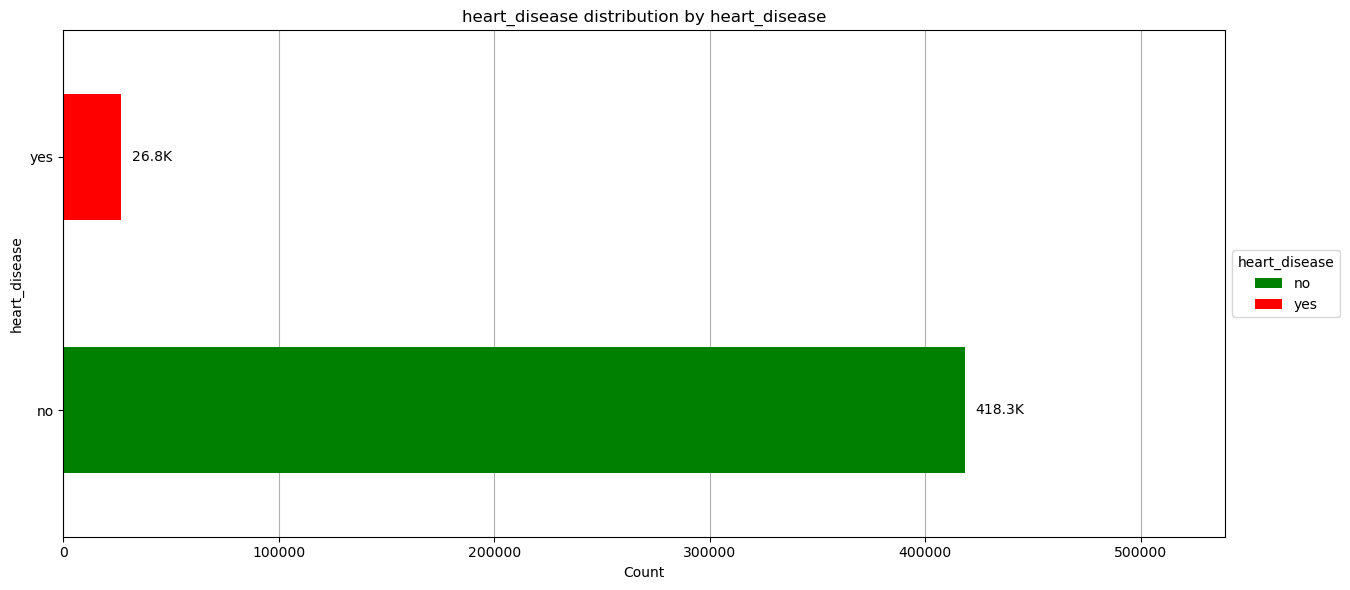

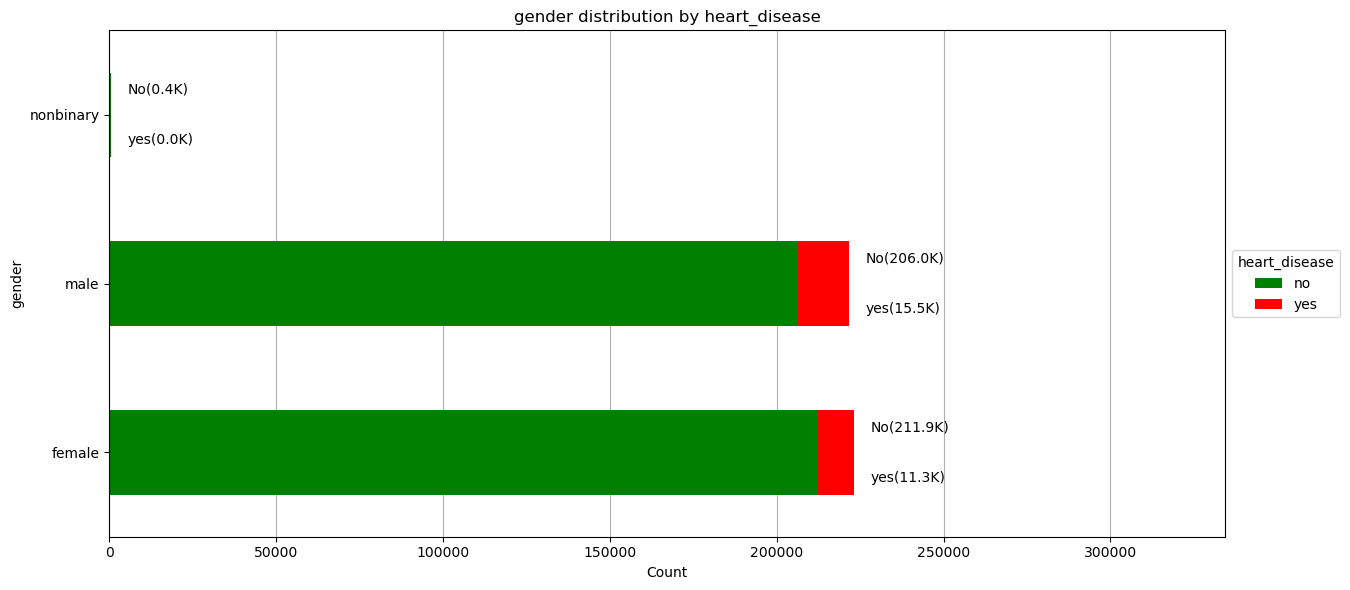

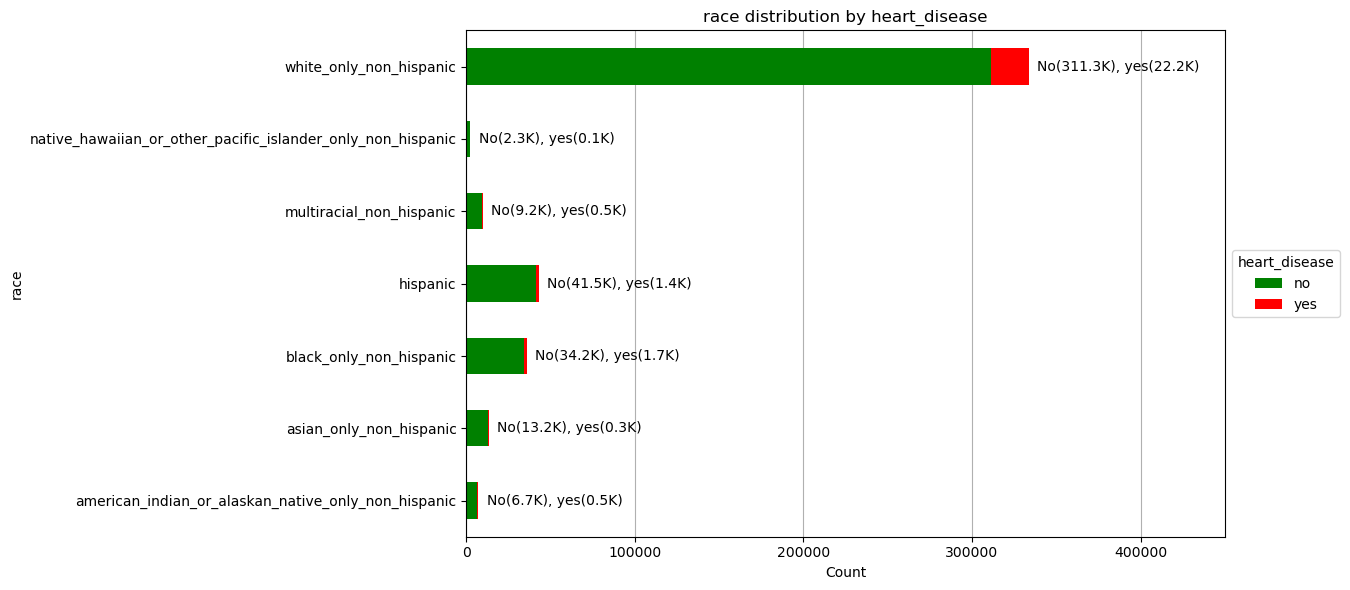

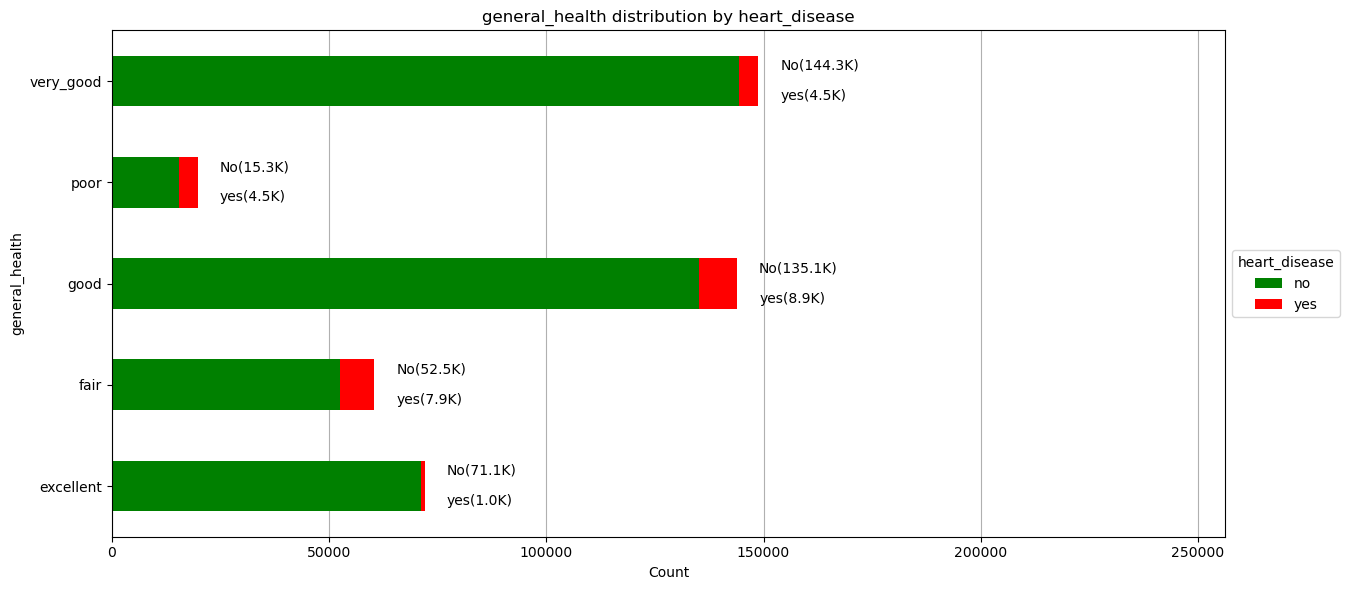

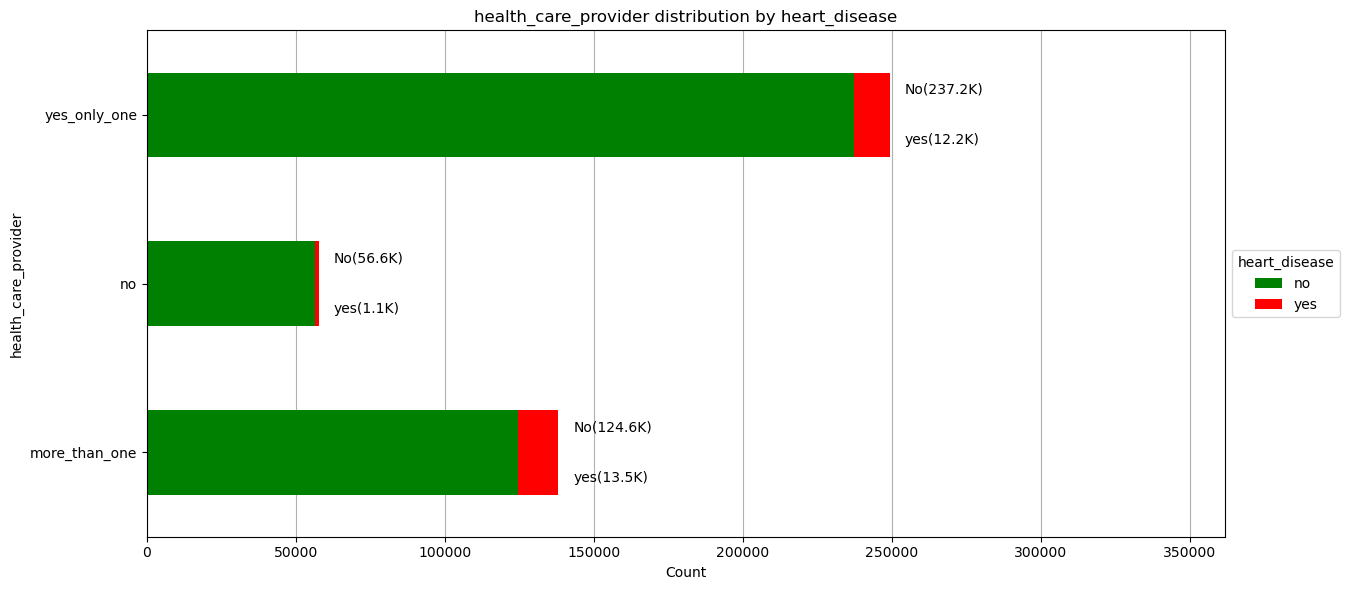

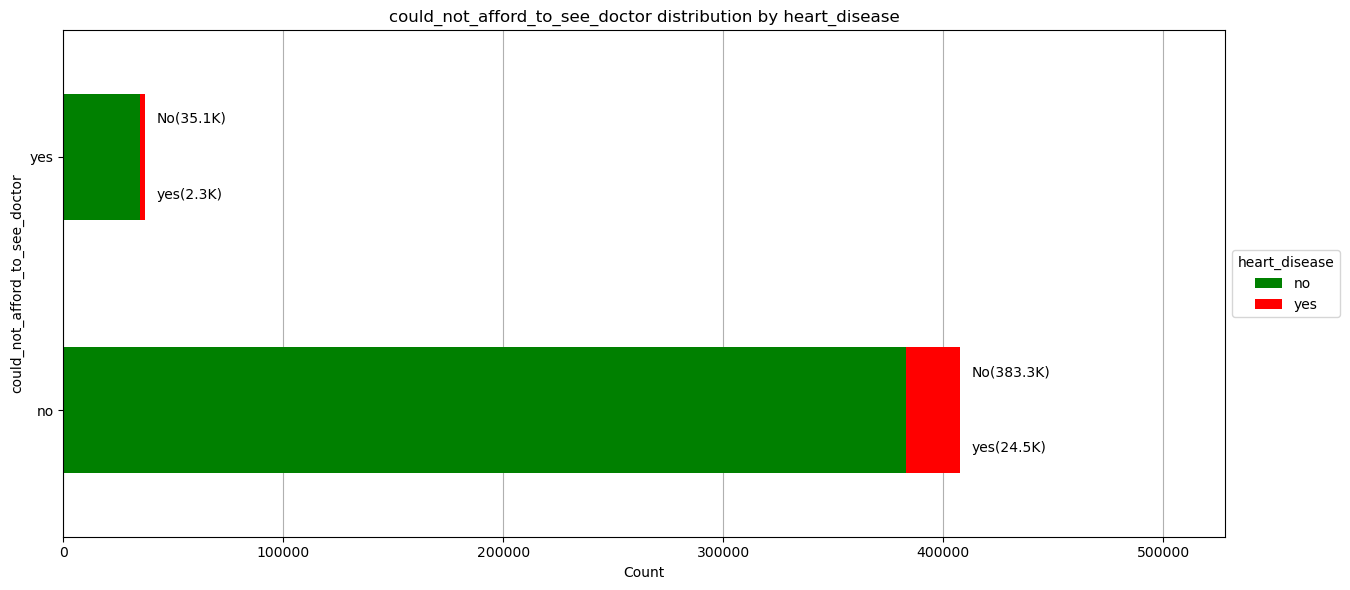

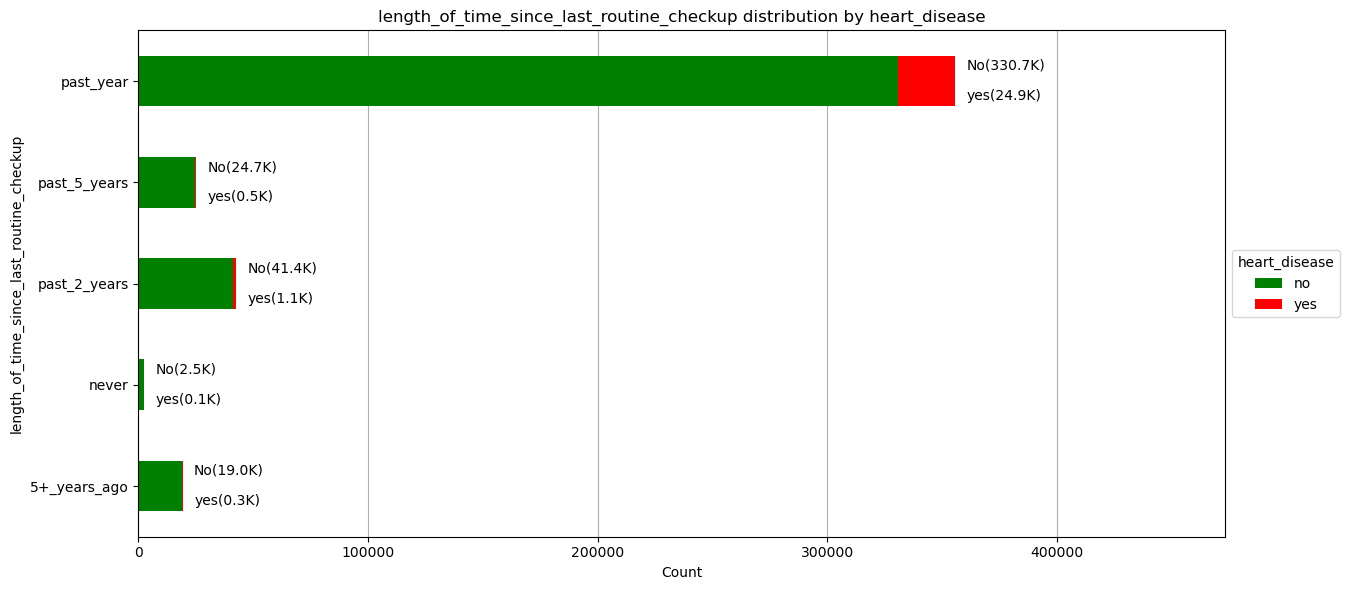

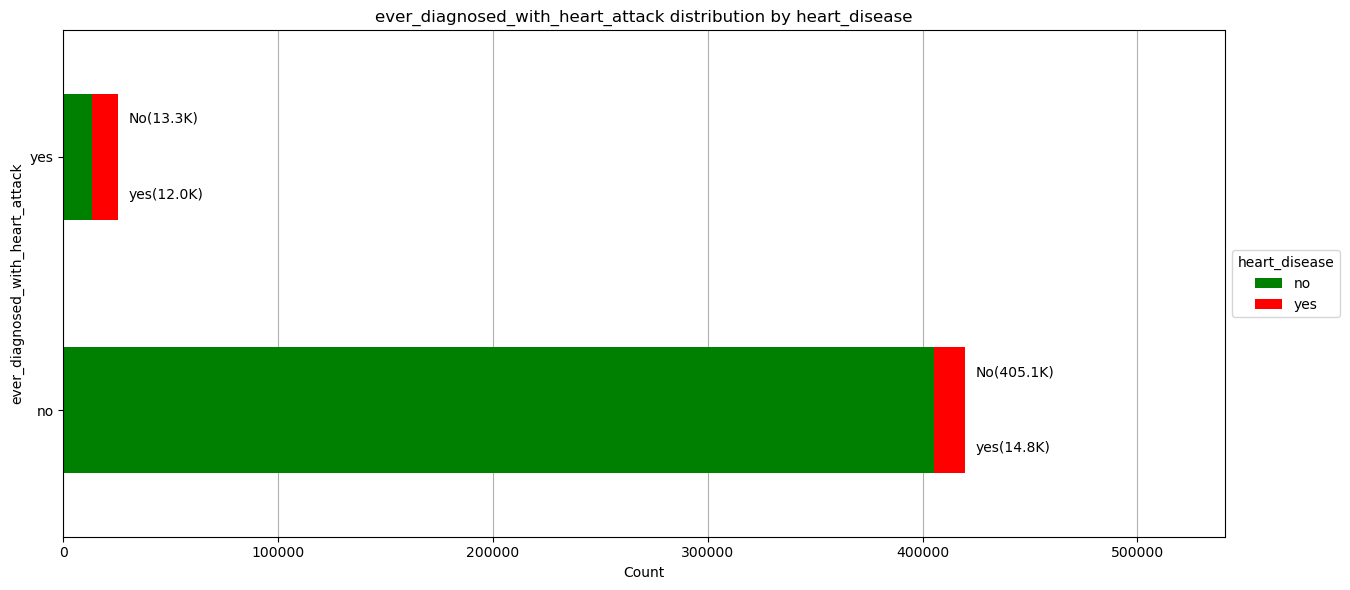

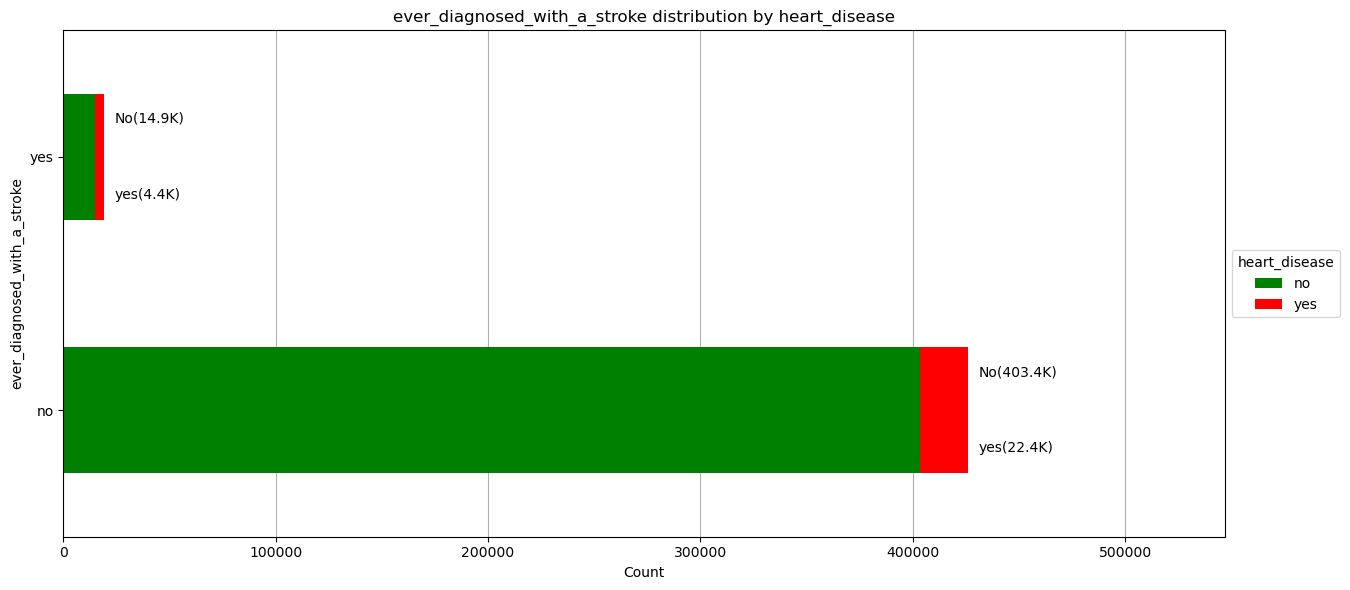

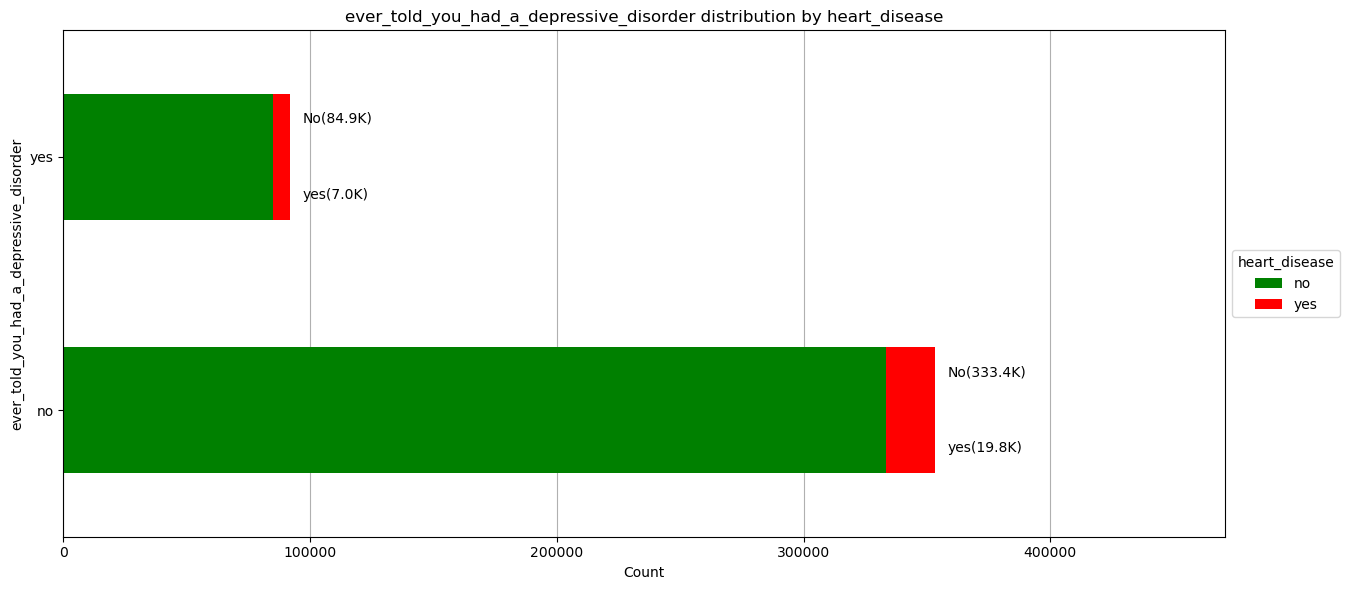

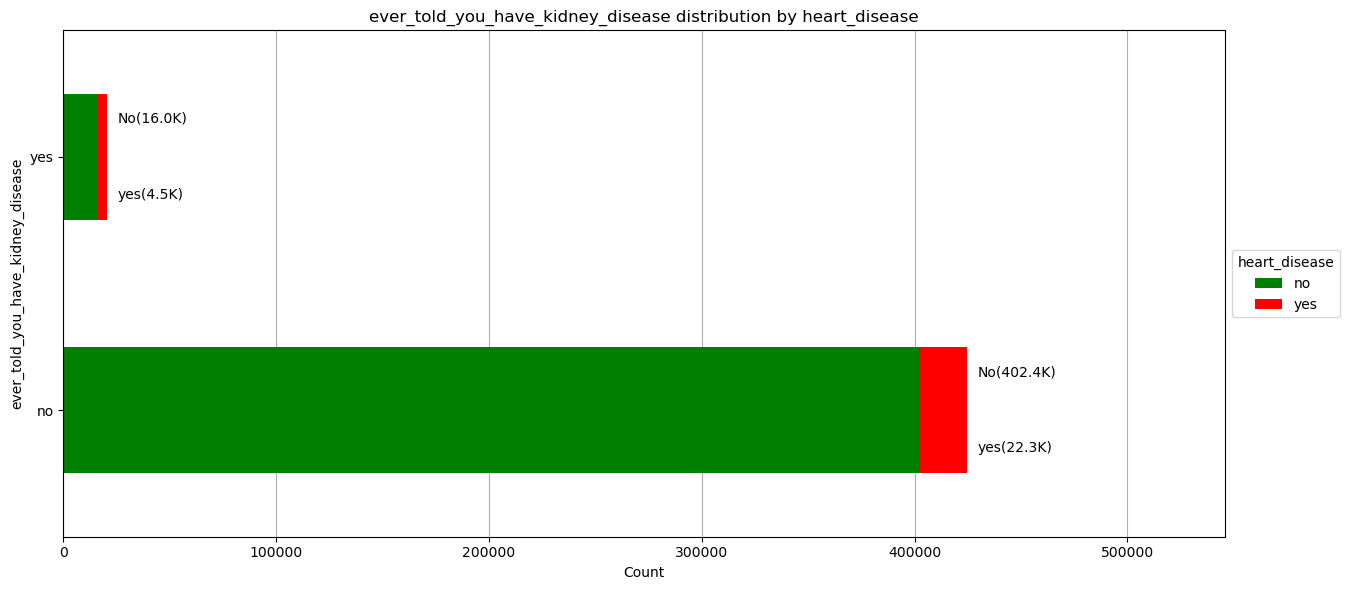

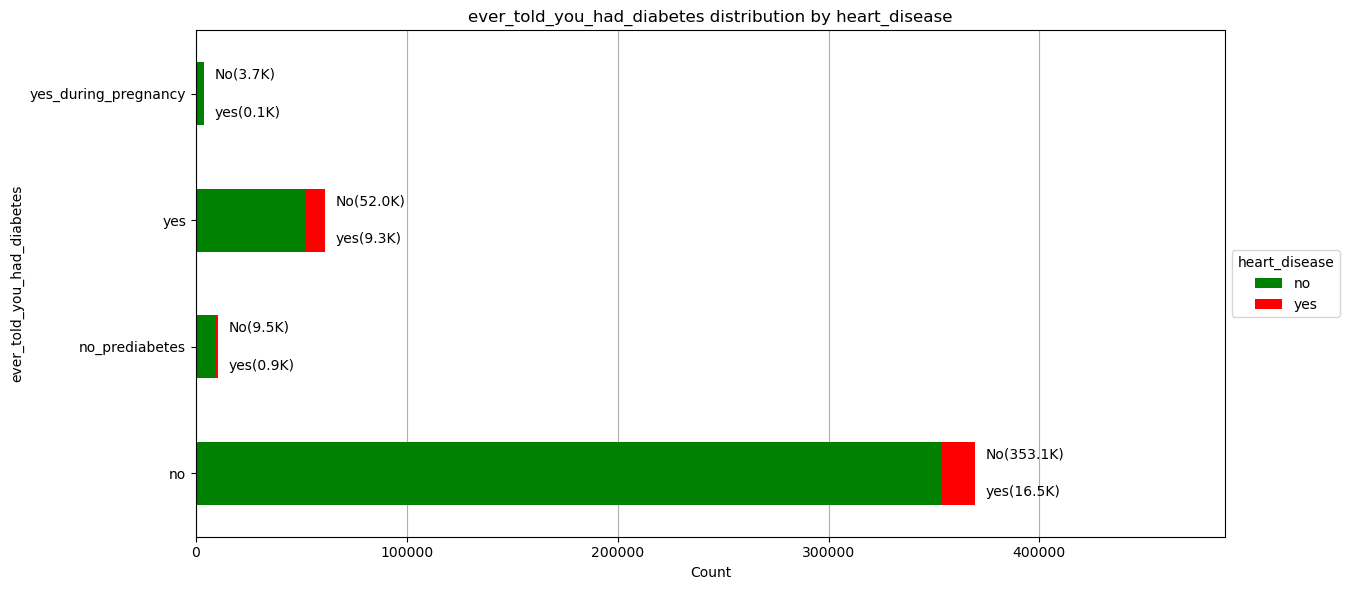

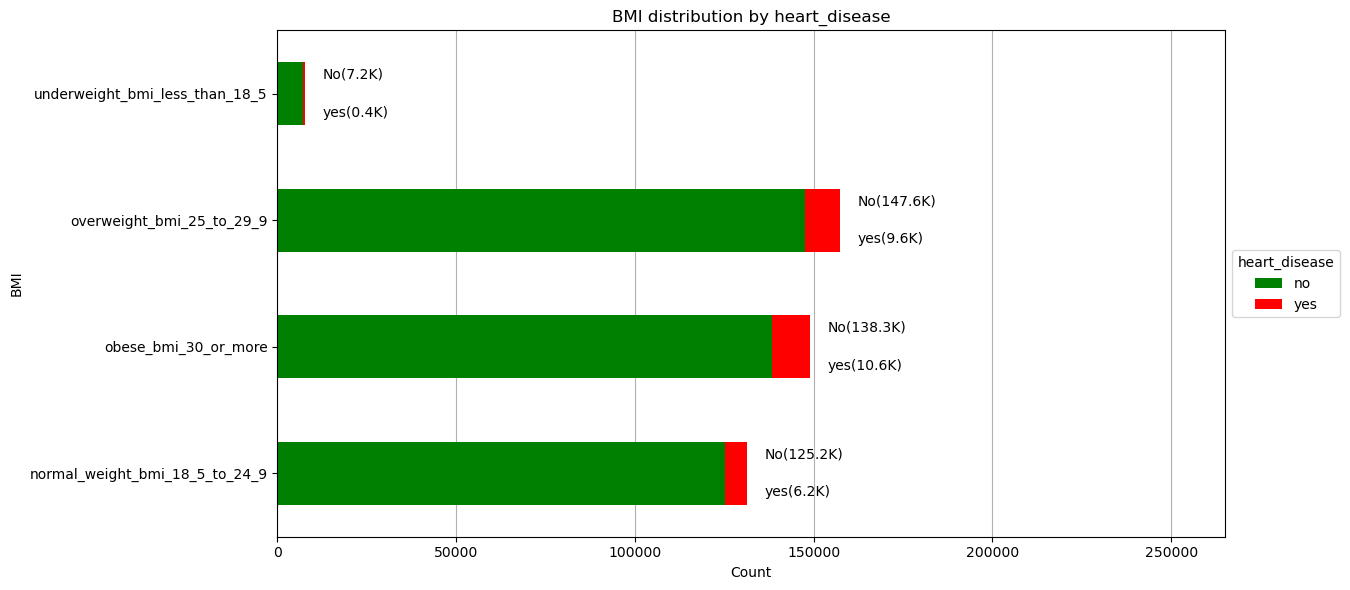

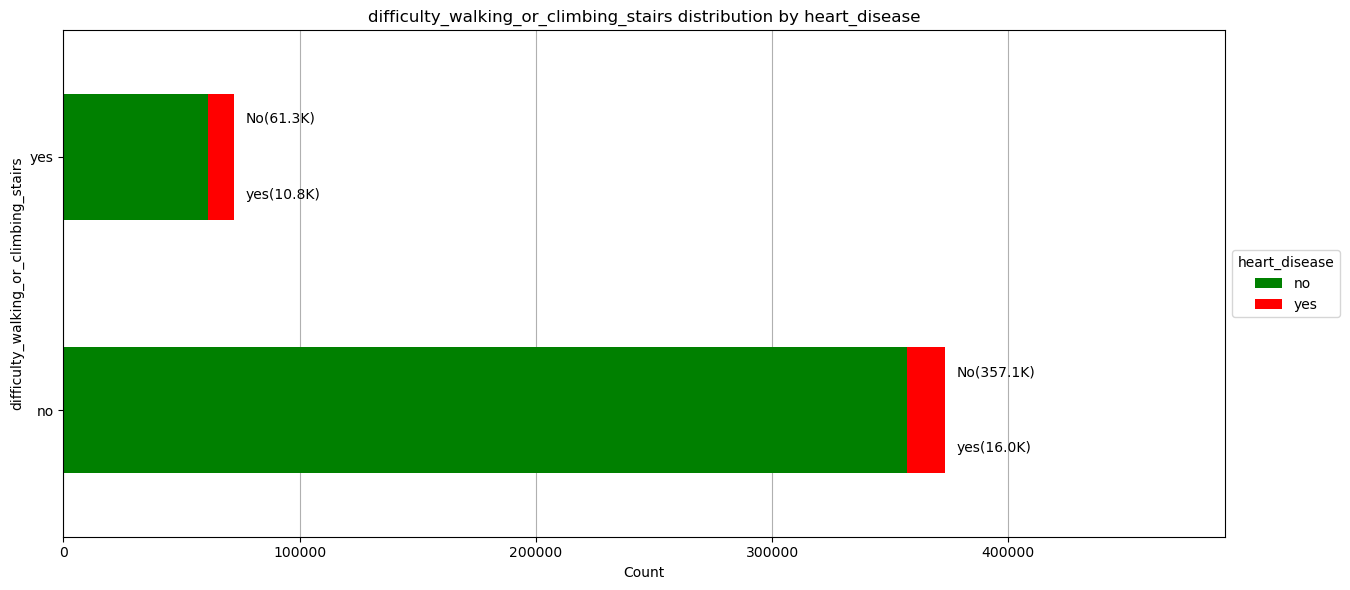

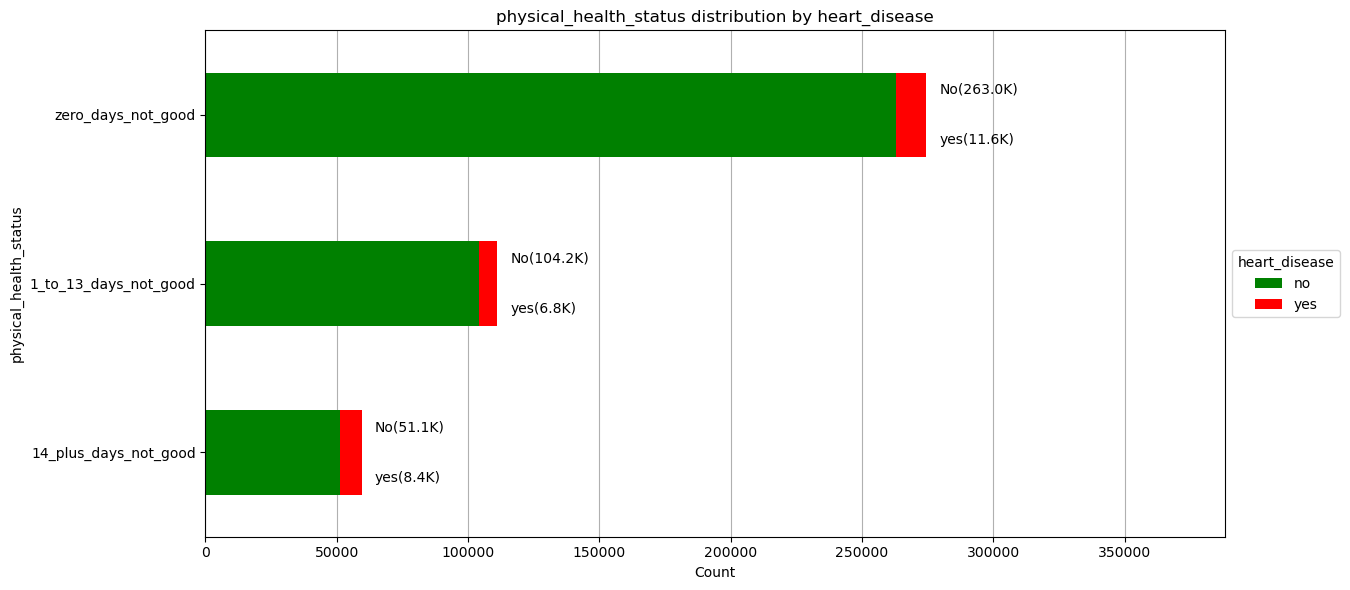

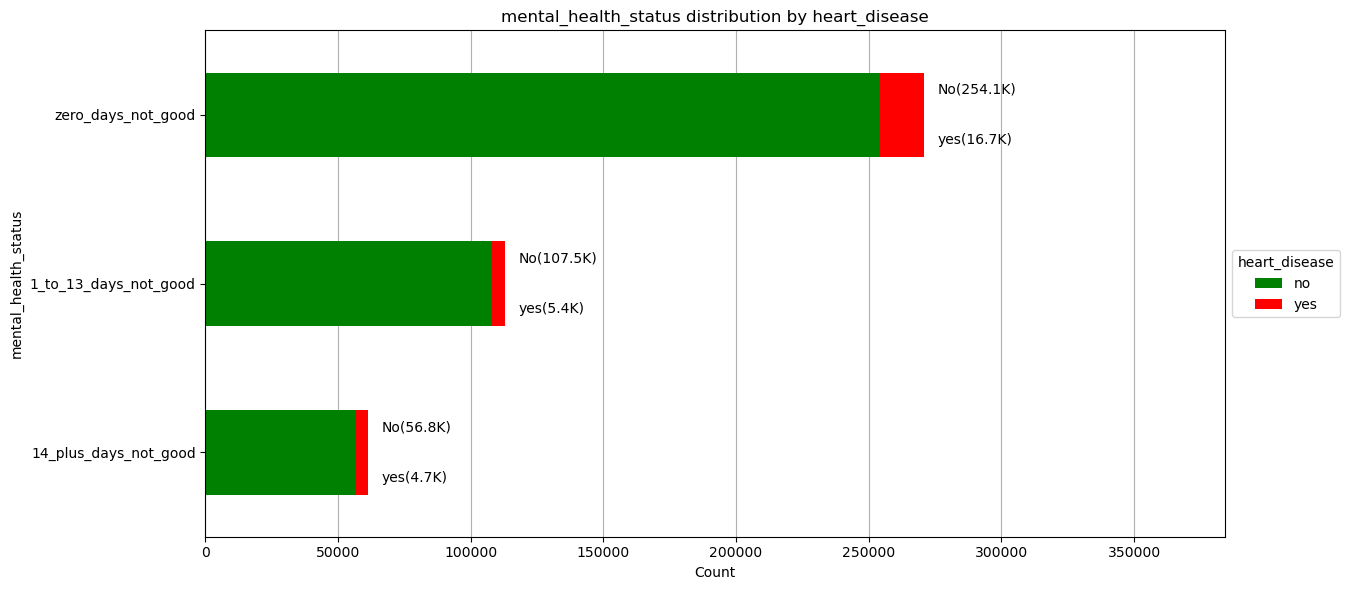

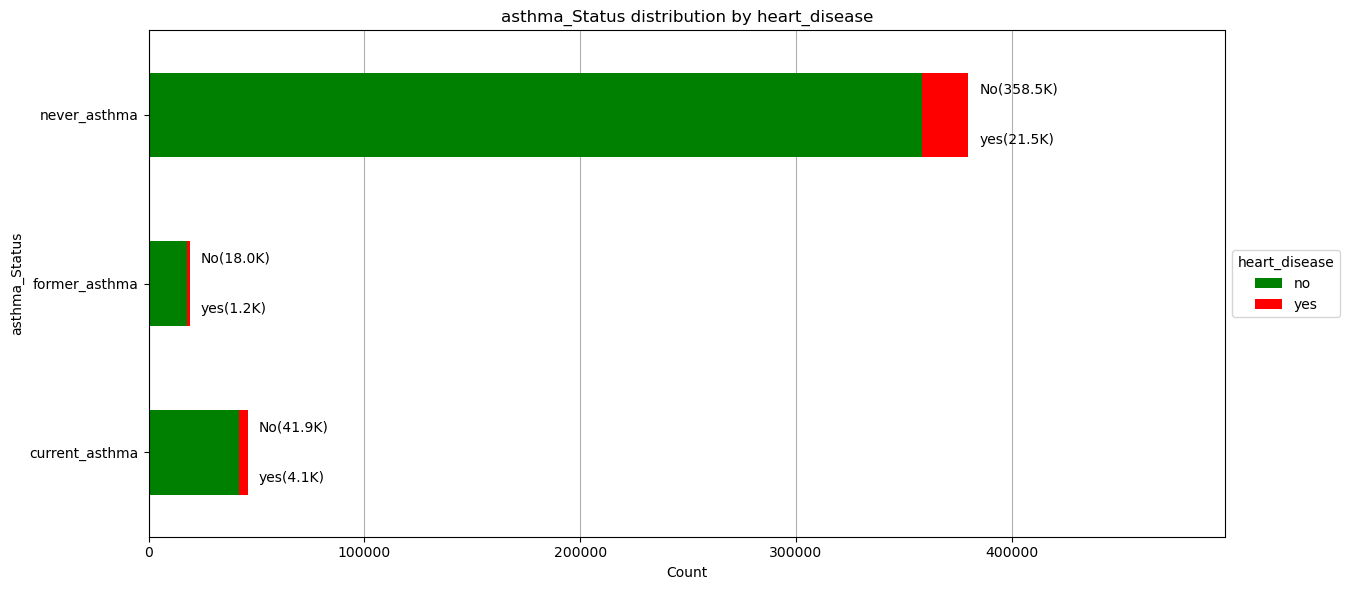

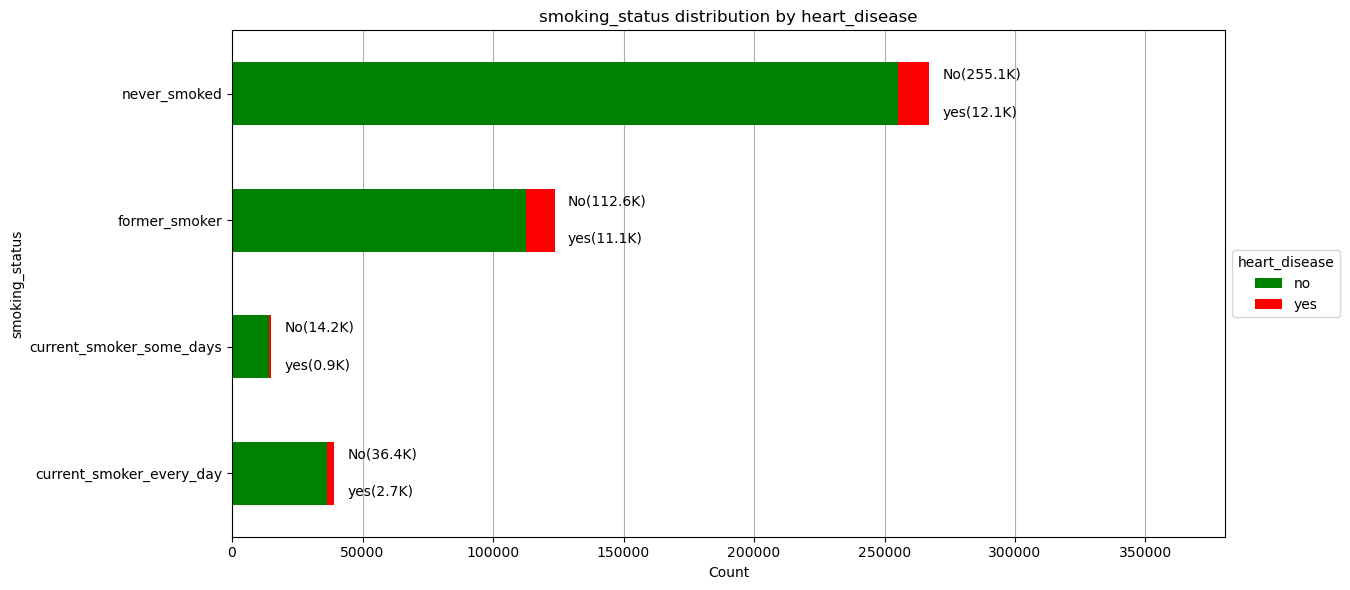

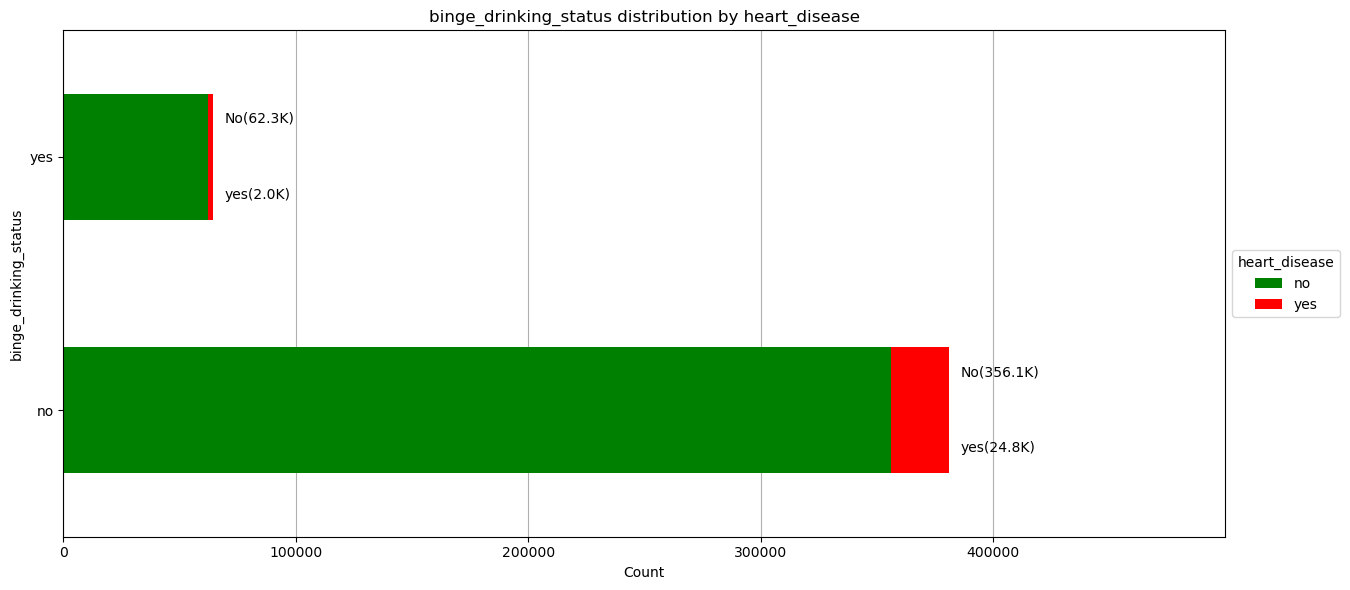

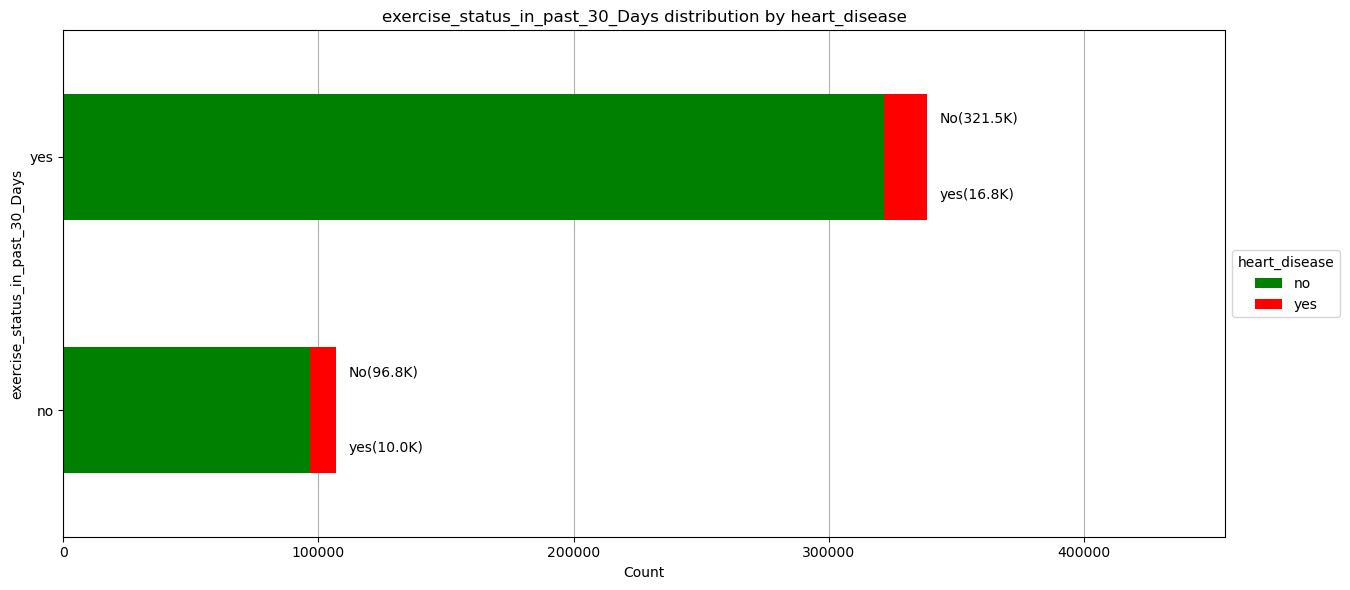

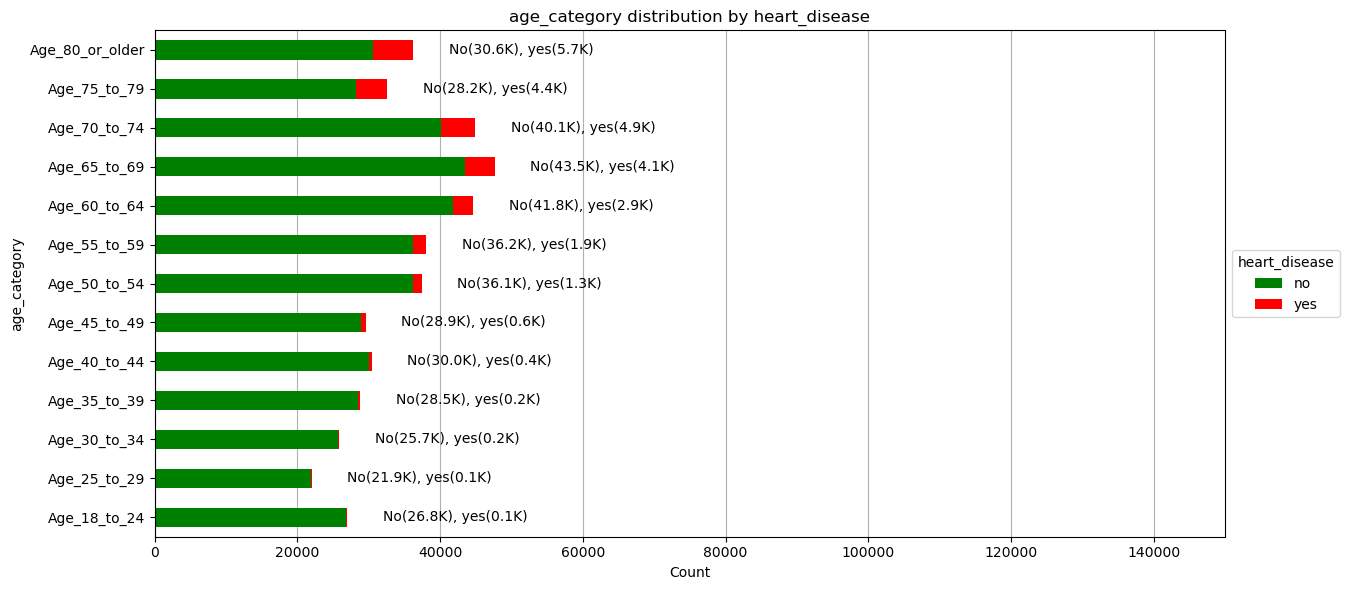

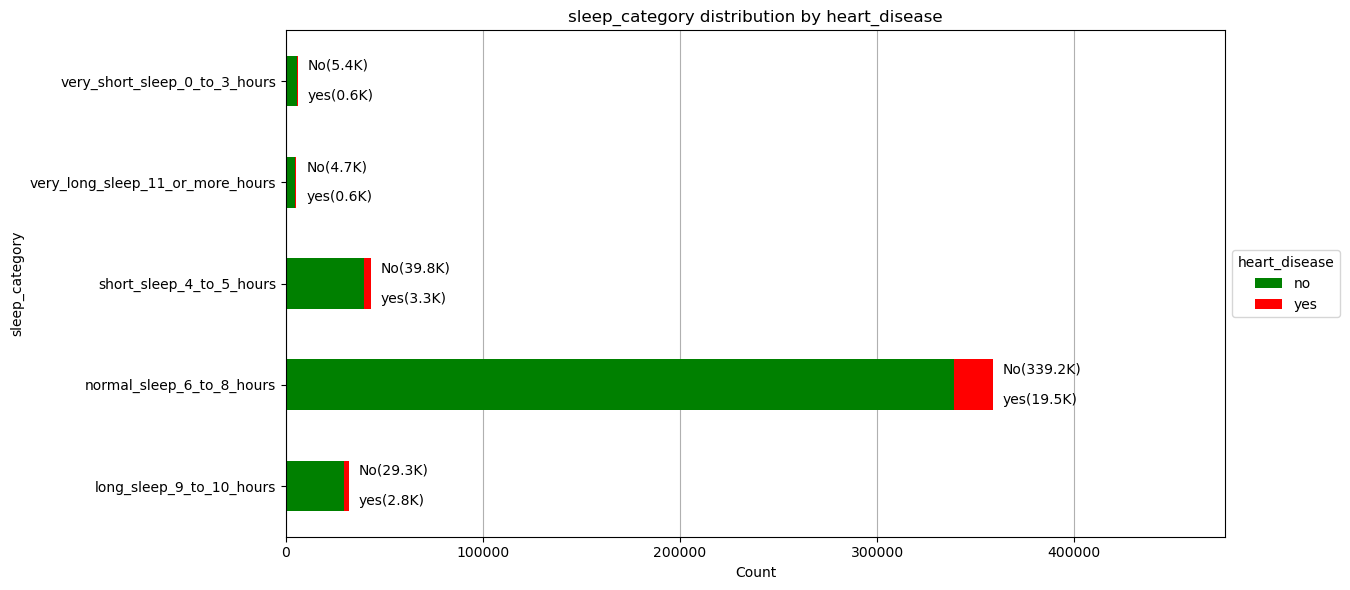

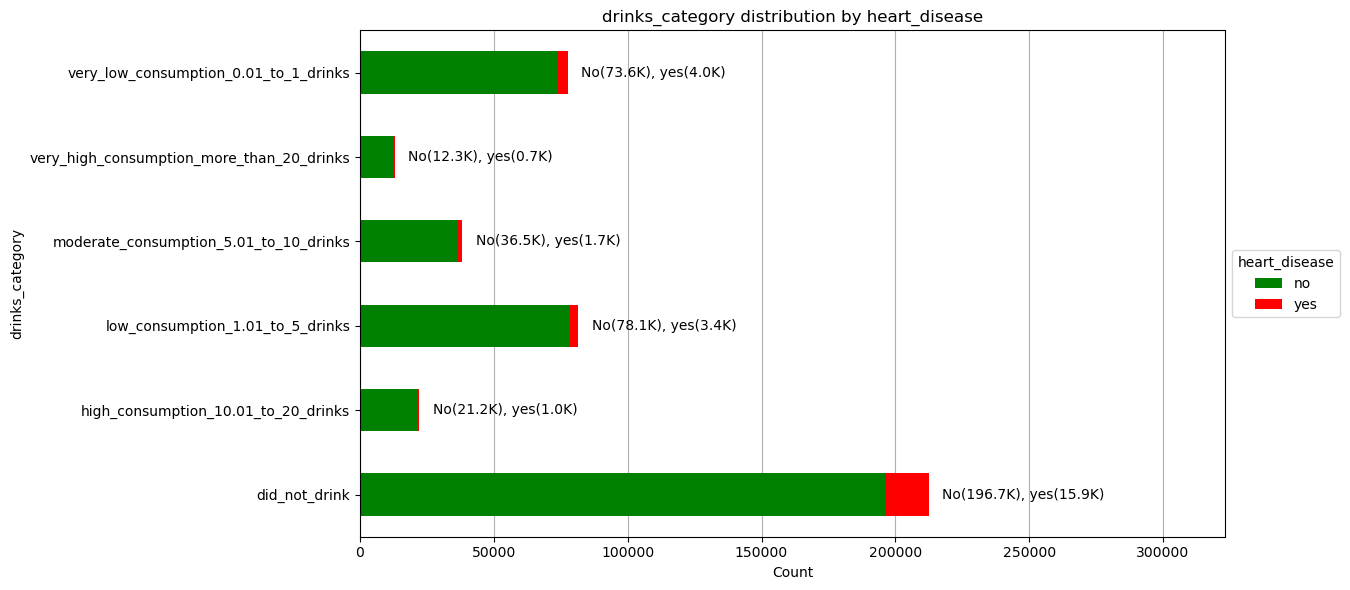

In [8]:
def plot_horizontal_stacked_bar(df, categorical_cols, target):
    """
    Plots horizontal stacked bar charts for categorical variables against the target variable.
    """
    for col in categorical_cols:
        # Create a crosstab
        crosstab = pd.crosstab(df[col], df[target])

        # Determine if there are six or more categories
        many_categories = len(crosstab) >= 6

        # Plot
        fig, ax = plt.subplots(figsize=(16, 6))  # Increase the width of the figure
        crosstab.plot(kind='barh', stacked=True, color=['green', 'red'], ax=ax)
        ax.set_title(f'{col} distribution by {target}')
        ax.set_xlabel('Count')
        ax.set_ylabel(col)
        ax.grid(True, axis='x')
        ax.set_axisbelow(True)  # Grid lines behind bars

        # Add labels outside the bars
        for i in range(len(crosstab)):
            total = sum(crosstab.iloc[i])
            if col == target:
                label = f"{crosstab.iloc[i].sum() / 1000:.1f}K"
                ax.text(total + 5000, i, label, ha='left', va='center', color='black')
            else:
                label_no = f"No({crosstab.iloc[i, 0] / 1000:.1f}K)"
                label_yes = f"yes({crosstab.iloc[i, 1] / 1000:.1f}K)"
                if many_categories:
                    # Labels next to each other
                    ax.text(total + 5000, i, f'{label_no}, {label_yes}', ha='left', va='center', color='black')
                else:
                    # Labels on top of each other, centered
                    ax.text(total + 5000, i + 0.15, f'{label_no}', ha='left', va='center', color='black')
                    ax.text(total + 5000, i - 0.15, f'{label_yes}', ha='left', va='center', color='black')

        # Adjust the limits to ensure labels fit
        ax.set_xlim(right=ax.get_xlim()[1] + 100000)

        # Move the legend outside of the plot area
        ax.legend(title=target, loc='center left', bbox_to_anchor=(1, 0.5))
        
        # Ensure labels and plot area fit within the figure
        plt.tight_layout(rect=[0, 0, 0.85, 1])
        plt.show()

# Define the list of categorical columns
categorical_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()

# Define the target variable
target = 'heart_disease'

# Call the function
plot_horizontal_stacked_bar(df, categorical_cols, target)


## **Categorical feature distributions: Chart Interpretations**<a id='Categorical_feature_distributions_Chart_Interpretations'></a>
[Contents](#Contents)

### **Heart Disease: Target Variable**<a id='Heart_Disease_Target_Variable'></a>
[Contents](#Contents)

**Distribution Analysis**
* There is a significant imbalance between the two categories.
* A large majority of individuals do not have heart disease `418.3K`, while a much smaller number have heart disease `26.8K`.
* This imbalance can be visually observed in the chart, where the green bar is substantially longer than the red bar.

**Imbalance Issue**
* Model Bias: When training a classification model on this imbalanced dataset, the model might become biased towards predicting the majority class (No heart disease) more frequently because it is seen more often in the training data.
* Performance Metrics: Common performance metrics like accuracy can be misleading in imbalanced datasets. For instance, a model that always predicts "No heart disease" will have high accuracy because the majority class is well represented. However, this model would fail to correctly identify individuals with heart disease, which is critical for healthcare applications.
* Recall and Precision: Metrics such as recall (sensitivity) and precision are more informative in this context. Recall measures the ability to identify true positive cases (heart disease), while precision measures the accuracy of positive predictions. In an imbalanced dataset, a model might have low recall for the minority class (heart disease) even if it has high accuracy overall.

**Strategy to Address Imbalance**
The `BalancedRandomForestClassifier` from the `imbalanced-learn` library effectively handles class imbalance by using bootstrapped sampling to balance the dataset, ensuring robust classification of minority classes. It enhances model performance by focusing on underrepresented data, making it ideal for imbalanced datasets like heart disease prediction.

### **Heart Disease vs Gender**<a id='Heart_Disease_vs_Gender'></a>
[Contents](#Contents)

**Distribution Analysis**

* The majority of individuals with heart disease are male `15.5K`, followed by female `11.3K`.
* There are very few nonbinary individuals with heart disease `15 individuals`.
* The significant difference in the number of heart disease cases among males and females compared to nonbinary individuals highlights a noticeable imbalance.

### **Heart Disease vs Race**<a id='Heart_Disease_vs_Race'></a>
[Contents](#Contents)

**Distribution Analysis**

* The largest group with heart disease is "White Only, Non-Hispanic," with `22.2K` individuals.
* Smaller groups, such as "Native Hawaiian or Other Pacific Islander Only, Non-Hispanic" and "Asian Only, Non-Hispanic," have very few individuals with heart disease (`100` and `300` individuals, respectively).
* There is a notable imbalance in the number of heart disease cases across different racial categories, with significantly fewer cases in minority groups.

### **Heart Disease vs General Health**<a id='Heart_Disease_vs_General_Health'></a>
[Contents](#Contents)

**Distribution Analysis**

* The highest number of individuals with heart disease falls into the "Good" health category `8.9K`, followed by the "Fair" category `7.9K`.
* Both "Very Good" and "Poor" health categories have the same number of individuals with heart disease `4.5K`.
* The "Excellent" health category has the fewest individuals with heart disease `1.0K`.
* There is a noticeable distribution of heart disease cases across different general health categories, with the highest incidence in individuals who self-report as having "Good" or "Fair" health.

### **Heart Disease vs Health Care Provider**<a id='Heart_Disease_vs_Health_Care_Provider'></a>
[Contents](#Contents)

**Distribution Analysis**

* The highest number of individuals with heart disease is in the "More Than One" health care provider category `13.5K`.
* The "Yes, Only One" category also has a significant number of individuals with heart disease `12.2K`.
* The "No" health care provider category has the fewest individuals with heart disease `1.1K`.
* This distribution suggests that individuals with multiple health care providers or at least one provider are more likely to have heart disease compared to those with no health care provider.

### **Heart Disease vs Doctor availability**<a id='Heart_Disease_vs_Doctor_availability'></a>
[Contents](#Contents)

**Distribution Analysis**

* The majority of individuals with heart disease fall into the category of those who could afford to see a doctor `24.5K`.
* A smaller number of individuals with heart disease could not afford to see a doctor `2.3K`.
* This distribution indicates that even among those with heart disease, most individuals could afford to see a doctor, suggesting access to healthcare does not completely mitigate the risk of heart disease.
* However, the presence of heart disease in individuals who could not afford to see a doctor highlights a potential issue with access to preventive care or treatment.

### **Heart Disease vs Routine Checkup**<a id='Heart_Disease_vs_routine_checkup'></a>
[Contents](#Contents)

**Distribution Analysis**

* The majority of individuals with heart disease had a routine checkup within the past year `24.9K`. This indicates that individuals with heart disease are more likely to have had recent medical attention.
* There are significantly fewer individuals with heart disease who had a routine checkup in the past 2 years `1.1K` and past 5 years `0.5K`.
* A very small number of individuals with heart disease reported never having a routine checkup `0.1K` or having their last checkup more than 5 years ago `0.3K`.
* This distribution suggests that even those with recent medical checkups are at risk of heart disease, highlighting the importance of regular monitoring and early detection. However, individuals with infrequent or no checkups are less likely to be diagnosed, possibly due to lower health awareness or access to healthcare.

### **Heart Disease vs Heart Attack**<a id='Heart_Disease_vs_Heart_Attack'></a>
[Contents](#Contents)

**Distribution Analysis**

* A significant number of individuals with heart disease have also been diagnosed with a heart attack `12.0K`. This indicates a strong correlation between a previous heart attack and the presence of heart disease.
* There are also a substantial number of individuals with heart disease who have not been diagnosed with a heart attack `14.8K`. This highlights that heart disease can develop without a prior heart attack diagnosis.
* The distribution suggests that while a prior heart attack is a significant indicator of heart disease, many individuals with heart disease have no history of a heart attack, emphasizing the need for comprehensive cardiovascular risk assessments beyond just heart attack history.

### **Heart Disease vs Stroke**<a id='Heart_Disease_vs_Stroke'></a>
[Contents](#Contents)

**Distribution Analysis**

* A significant number of individuals with heart disease have also been diagnosed with a stroke `4.4K`. This indicates a notable correlation between a previous stroke and the presence of heart disease.
* A larger number of individuals with heart disease have not been diagnosed with a stroke `22.4K`. This shows that heart disease can occur independently of a stroke diagnosis.
* The distribution suggests that while a prior stroke is a significant risk factor for heart disease, many individuals with heart disease do not have a history of stroke. This highlights the importance of a comprehensive cardiovascular risk assessment, considering various risk factors beyond just stroke history.

### **Heart Disease vs Kidney Disease**<a id='Heart_Disease_vs_Kidney_Disease'></a>
[Contents](#Contents)

**Distribution Analysis**

* A notable number of individuals with heart disease have also been diagnosed with kidney disease `4.5K`. This indicates a correlation between kidney disease and heart disease.
* A larger number of individuals with heart disease have not been diagnosed with kidney disease `22.3K`. This shows that heart disease frequently occurs independently of kidney disease.
* The distribution suggests that while kidney disease is a significant risk factor for heart disease, the majority of individuals with heart disease do not have a history of kidney disease. This underscores the importance of evaluating multiple risk factors for heart disease, including but not limited to kidney disease history.

### **Heart Disease vs Diabetes**<a id='Heart_Disease_vs_Diabetes'></a>
[Contents](#Contents)

**Distribution Analysis**

* The highest number of individuals with heart disease are in the category of those who do not have diabetes `16.5K`. This indicates that heart disease is prevalent even among those without a diabetes diagnosis.
* A significant number of individuals with heart disease have been diagnosed with diabetes `9.3K`. This highlights the strong correlation between diabetes and heart disease.
* A smaller number of individuals with heart disease have prediabetes `0.9K` or had diabetes during pregnancy `0.1K`, suggesting these conditions are less common among those with heart disease compared to a full diabetes diagnosis.
* The distribution emphasizes the importance of monitoring and managing diabetes as a critical risk factor for heart disease. However, the presence of heart disease in individuals without diabetes underscores the multifactorial nature of cardiovascular risk.

### **Heart Disease vs BMI**<a id='Heart_Disease_vs_BMI'></a>
[Contents](#Contents)

**Distribution Analysis**

* The highest number of individuals with heart disease falls into the obese category `10.6K`, indicating a strong correlation between obesity and heart disease.
* The overweight category also has a significant number of individuals with heart disease `9.6K`, further highlighting the relationship between higher BMI and heart disease risk.
* Individuals with a normal weight `6.2K` and underweight `0.4K` have fewer cases of heart disease, suggesting that maintaining a normal weight may be associated with a lower risk of heart disease.
* This distribution underscores the importance of managing body weight as a critical factor in reducing the risk of heart disease, with obesity and overweight being key areas of concern.

### **Heart Disease vs Difficulty Walking or Climbing**<a id='Heart_Disease_vs_Difficulty_Walking_or_Climbing'></a>
[Contents](#Contents)

**Distribution Analysis**

* A notable number of individuals with heart disease report having difficulty walking or climbing stairs `10.8K`. This indicates a strong association between mobility issues and the presence of heart disease.
* A slightly higher number of individuals with heart disease do not report difficulty walking or climbing stairs `16.0K`. This shows that heart disease can occur even in those without significant mobility issues.
* The distribution suggests that difficulty in walking or climbing stairs is a significant risk factor for heart disease, but it also highlights that heart disease is present in a considerable number of individuals without mobility challenges. This underscores the importance of comprehensive cardiovascular risk assessments that consider a variety of health factors.

### **Heart Disease vs Physical Health Status**<a id='Heart_Disease_vs_Physical_Health_Status'></a>
[Contents](#Contents)

**Distribution Analysis**

* The highest number of individuals with heart disease report having zero days of not feeling good physically `11.6K`. This indicates that a significant portion of individuals with heart disease perceive their physical health as generally good.
* A notable number of individuals with heart disease report having 14 or more days of not feeling good physically `8.4K`. This suggests a correlation between prolonged periods of poor physical health and heart disease.
* Individuals reporting 1 to 13 days of not feeling good physically account for `6.8K` cases of heart disease.
* The distribution highlights the importance of considering physical health status in assessing the risk of heart disease. While many individuals with heart disease report good physical health, there is a substantial group experiencing frequent poor physical health days, which may be an indicator of underlying issues.

### **Heart Disease vs Mental Health Status**<a id='Heart_Disease_vs_Mental_Health_Status'></a>
[Contents](#Contents)

**Distribution Analysis**

* The highest number of individuals with heart disease report having zero days of not feeling good mentally `16.7K`. This suggests that many individuals with heart disease perceive their mental health as generally good.
* A significant number of individuals with heart disease report having 1 to 13 days of not feeling good mentally `5.4K`. This indicates a noticeable correlation between moderate periods of poor mental health and the presence of heart disease.
* Individuals reporting 14 or more days of not feeling good mentally account for `4.7K` cases of heart disease. This suggests that prolonged periods of poor mental health are also a factor among individuals with heart disease.
* The distribution highlights the importance of considering mental health status in assessing the risk of heart disease. While many individuals with heart disease report good mental health, there is a substantial group experiencing frequent poor mental health days, indicating the need for comprehensive health evaluations.

### **Heart Disease vs Asthma**<a id='Heart_Disease_vs_Asthma'></a>
[Contents](#Contents)

**Distribution Analysis**

* The highest number of individuals with heart disease falls into the "Never Asthma" category `21.5K`. This suggests that a large portion of individuals with heart disease do not have a history of asthma.
* A smaller number of individuals with heart disease have current asthma `4.1K`, indicating a correlation between ongoing asthma and heart disease.
* The smallest number of individuals with heart disease are those with former asthma `1.2K`. This suggests that having had asthma in the past is less common among individuals with heart disease compared to never having had asthma or currently having asthma.
* The distribution highlights the importance of considering asthma status in assessing the risk of heart disease. While many individuals with heart disease have never had asthma, there is still a significant group with current asthma, indicating the need for careful monitoring and management of both conditions.

### **Heart Disease vs Smoking status**<a id='Heart_Disease_vs_Smoking_Status'></a>
[Contents](#Contents)

**Distribution Analysis**

* The highest number of individuals with heart disease are those who have never smoked `12.1K`. This may reflect the larger population size of never smokers.
* Former smokers have a high number of heart disease cases `11.1K`. This suggests that the health effects of smoking may persist even after quitting, leading to higher rates of heart disease among former smokers.
* Current smokers who smoke every day also have a notable number of heart disease cases `2.7K`, indicating that ongoing smoking significantly contributes to heart disease risk.
* Interestingly, current smokers who smoke only on some days have the fewest heart disease cases `0.9K`. This might be due to the smaller size of this subgroup or underreporting.

**Why Former Smokers Have Higher Cases Compared to Current Smokers (Some Days)?**

* Long-Term Effects of Smoking: Former smokers may have smoked for many years before quitting, leading to cumulative damage to their cardiovascular system. The adverse effects of prolonged smoking can persist long after quitting, increasing the risk of heart disease.
* Health Improvements: Current smokers who smoke only on some days might have a lower overall exposure to smoking-related toxins compared to those who smoked regularly for years before quitting.
* Population Size: The former smoker category likely includes a larger and more diverse group of individuals than the current smokers (some days) category, which might be relatively smaller and less representative of heavy, long-term smokers.
  
The distribution highlights the importance of considering smoking history in assessing heart disease risk. Even after quitting, former smokers continue to face a high risk, underscoring the long-term health impacts of smoking. Current smokers, especially those who smoke daily, also face significant risks, emphasizing the need for smoking cessation programs and ongoing monitoring of cardiovascular health.

### **Heart Disease vs Binge Drinking Status**<a id='Heart_Disease_vs_Binge_Drinking_Status'></a>
[Contents](#Contents)

**Distribution Analysis**

* The majority of individuals with heart disease do not engage in binge drinking `24.8K`. This suggests that while binge drinking is a risk factor, many individuals with heart disease do not exhibit this behavior.
* A smaller number of individuals with heart disease report engaging in binge drinking `2.0K`. This indicates that binge drinking is associated with heart disease, but it is less prevalent among heart disease patients compared to those who do not binge drink.
* The distribution highlights the importance of considering alcohol consumption patterns in assessing the risk of heart disease. While binge drinking is a significant risk factor, it is not the sole determinant of heart disease, as a substantial number of heart disease cases occur in individuals who do not binge drink. This underscores the multifactorial nature of heart disease risk and the need for comprehensive health assessments that include lifestyle factors such as alcohol consumption.

### **Heart Disease vs Exercise Status**<a id='Heart_Disease_vs_Exercise_Status'></a>
[Contents](#Contents)

**Distribution Analysis**

* A significant number of individuals with heart disease report having exercised in the past 30 days `16.8K`. This suggests that exercise, while beneficial, does not entirely prevent the occurrence of heart disease, possibly due to other overriding risk factors.
* A notable number of individuals with heart disease report not having exercised in the past 30 days `10.0K`. This indicates a correlation between lack of exercise and the presence of heart disease.
* The distribution highlights the importance of regular physical activity as a component of heart disease prevention. However, it also underscores that exercise alone is not sufficient to mitigate all risks associated with heart disease, emphasizing the need for a holistic approach to cardiovascular health that includes diet, lifestyle changes, and regular medical checkups.

### **Heart Disease vs Age Category**<a id='Heart_Disease_vs_Age_Category'></a>
[Contents](#Contents)

**Distribution Analysis**

* The highest number of individuals with heart disease are in the age category of 70 to 74 `4.9K`, followed closely by the 80 or older category `5.7K`, and 75 to 79 category `4.4K`. This suggests a strong correlation between advanced age and the presence of heart disease.
* The number of individuals with heart disease generally increases with age, peaking in the older age categories. This indicates that age is a significant risk factor for heart disease.
* There are relatively few individuals with heart disease in the younger age categories (18 to 24 and 25 to 29), highlighting that while younger individuals can have heart disease, it is less common compared to older age groups.
* The distribution underscores the importance of age as a critical factor in heart disease risk assessment. It suggests that preventive measures and monitoring should be more rigorous as individuals age, particularly for those over 65.

### **Heart Disease vs Sleep Category**<a id='Heart_Disease_vs_Sleep_Category'></a>
[Contents](#Contents)

**Distribution Analysis**

* The highest number of individuals with heart disease are in the normal sleep category (6 to 8 hours) with `19.5K` individuals. This suggests that many individuals with heart disease report getting a standard amount of sleep.
* There are fewer individuals with heart disease in the very short sleep (0 to 3 hours) and very long sleep (11 or more hours) categories, each with `0.6K` individuals. This indicates that extreme sleep durations are less common among those with heart disease, but they are still present.
* Short sleep (4 to 5 hours) has `3.3K` individuals with heart disease, showing a significant correlation between insufficient sleep and heart disease.
* Long sleep (9 to 10 hours) includes `2.8K` individuals with heart disease, suggesting that extended sleep duration is also associated with heart disease, though to a lesser extent than normal sleep duration.
* The distribution highlights the complex relationship between sleep duration and heart disease. While normal sleep duration is common among those with heart disease, both insufficient and excessive sleep are also important factors to consider in cardiovascular risk assessments. This underscores the importance of promoting healthy sleep habits as part of overall heart health.

### **Heart Disease vs Drinking Status**<a id='Heart_Disease_vs_Drinking_Status'></a>
[Contents](#Contents)

**Distribution Analysis**

* The highest number of individuals with heart disease fall into the "Did Not Drink" category with `15.9K` individuals. This suggests that abstaining from alcohol is common among those with heart disease, possibly due to health reasons or pre-existing conditions.
* Very low alcohol consumption (0.01 to 1 drinks) is the second most common category among those with heart disease, with `4.0K` individuals. This indicates that minimal alcohol consumption is still present among those with heart disease.
* Low consumption (1.01 to 5 drinks) includes `3.4K` individuals with heart disease, highlighting that moderate drinking is also observed among this population.
* Moderate consumption (5.01 to 10 drinks) and high consumption (10.01 to 20 drinks) have fewer cases of heart disease with `1.7K` and `1.0K` individuals respectively.
* Very high consumption (more than 20 drinks) is the least common among those with heart disease, with `0.7K` individuals.
* The distribution suggests that while many individuals with heart disease either do not drink or consume very little alcohol, moderate to high consumption is less common among this group. This emphasizes the importance of considering alcohol consumption habits in the context of heart disease risk and highlights the potential benefits of moderate or no alcohol consumption for heart health.

## **Correlation: Heart Disease vs all features**<a id='Correlation_Heart_Disease_vs_all_features'></a>
[Contents](#Contents)


In this analysis, we aim to understand the relationships between heart disease and various other features in our dataset. Specifically, we will be focusing on three main tasks:

* Encoding Categorical Variables: Converting all categorical features into numerical values using CatBoost encoding. This step ensures that we can effectively use these features in our analysis. Process: convert all categorical features to numerical values using the `CatBoost encoder` from the `category_encoders` package. This encoding method handles categorical variables effectively, preserving their informational content.
* Calculating Mutual Information: Assessing the predictive power of each feature with respect to heart disease by calculating the mutual information. Mutual information measures the dependency between the features and the target variable. Process: we calculate the mutual information for each feature with respect to heart disease. `Mutual information` provides a measure of the dependency between variables, allowing us to identify which features have the most predictive power.
* Calculating Pearson Correlation: Generating a heatmap to visualize the Pearson correlation coefficients between heart disease and all other features. This helps us understand the linear relationships in the dataset, although it is less informative for a binary target. Process: we calculate the `Pearson correlation` coefficients between heart disease and all other features. We visualize these correlations using a heatmap, which helps us easily identify strong linear relationships in the dataset.

In [9]:
df.head()

,heart_disease,gender,race,general_health,health_care_provider,could_not_afford_to_see_doctor,length_of_time_since_last_routine_checkup,ever_diagnosed_with_heart_attack,ever_diagnosed_with_a_stroke,ever_told_you_had_a_depressive_disorder,ever_told_you_have_kidney_disease,ever_told_you_had_diabetes,BMI,difficulty_walking_or_climbing_stairs,physical_health_status,mental_health_status,asthma_Status,smoking_status,binge_drinking_status,exercise_status_in_past_30_Days,age_category,sleep_category,drinks_category
0,no,female,white_only_non_hispanic,very_good,yes_only_one,no,past_year,no,no,no,no,yes,overweight_bmi_25_to_29_9,no,zero_days_not_good,zero_days_not_good,never_asthma,never_smoked,no,no,Age_80_or_older,normal_sleep_6_to_8_hours,did_not_drink
1,no,male,white_only_non_hispanic,excellent,more_than_one,no,never,no,no,no,no,no,overweight_bmi_25_to_29_9,no,zero_days_not_good,zero_days_not_good,never_asthma,never_smoked,no,no,Age_80_or_older,normal_sleep_6_to_8_hours,did_not_drink
2,no,male,white_only_non_hispanic,very_good,yes_only_one,no,past_year,no,no,no,no,no,overweight_bmi_25_to_29_9,no,1_to_13_days_not_good,1_to_13_days_not_good,never_asthma,never_smoked,no,yes,Age_55_to_59,short_sleep_4_to_5_hours,did_not_drink
3,no,female,white_only_non_hispanic,excellent,yes_only_one,no,past_year,no,no,no,no,no,normal_weight_bmi_18_5_to_24_9,no,zero_days_not_good,zero_days_not_good,current_asthma,current_smoker_some_days,no,yes,Age_70_to_74,normal_sleep_6_to_8_hours,did_not_drink
4,no,male,white_only_non_hispanic,fair,more_than_one,no,past_year,no,no,no,no,no,normal_weight_bmi_18_5_to_24_9,no,1_to_13_days_not_good,zero_days_not_good,never_asthma,never_smoked,no,yes,Age_40_to_44,long_sleep_9_to_10_hours,low_consumption_1.01_to_5_drinks


In [10]:
df.columns

Index(['heart_disease', 'gender', 'race', 'general_health',
       'health_care_provider', 'could_not_afford_to_see_doctor',
       'length_of_time_since_last_routine_checkup',
       'ever_diagnosed_with_heart_attack', 'ever_diagnosed_with_a_stroke',
       'ever_told_you_had_a_depressive_disorder',
       'ever_told_you_have_kidney_disease', 'ever_told_you_had_diabetes',
       'BMI', 'difficulty_walking_or_climbing_stairs',
       'physical_health_status', 'mental_health_status', 'asthma_Status',
       'smoking_status', 'binge_drinking_status',
       'exercise_status_in_past_30_Days', 'age_category', 'sleep_category',
       'drinks_category'],
      dtype='object')

### **Features Selection**<a id='Features_Selection'></a>
[Contents](#Contents)

In [11]:
# Define the target variable:
target = 'heart_disease'

# Convert the target variable to numerical values:
df[target] = df[target].apply(lambda x: 1 if x == 'yes' else 0).astype('int')

In [12]:
df.head()

,heart_disease,gender,race,general_health,health_care_provider,could_not_afford_to_see_doctor,length_of_time_since_last_routine_checkup,ever_diagnosed_with_heart_attack,ever_diagnosed_with_a_stroke,ever_told_you_had_a_depressive_disorder,ever_told_you_have_kidney_disease,ever_told_you_had_diabetes,BMI,difficulty_walking_or_climbing_stairs,physical_health_status,mental_health_status,asthma_Status,smoking_status,binge_drinking_status,exercise_status_in_past_30_Days,age_category,sleep_category,drinks_category
0,0,female,white_only_non_hispanic,very_good,yes_only_one,no,past_year,no,no,no,no,yes,overweight_bmi_25_to_29_9,no,zero_days_not_good,zero_days_not_good,never_asthma,never_smoked,no,no,Age_80_or_older,normal_sleep_6_to_8_hours,did_not_drink
1,0,male,white_only_non_hispanic,excellent,more_than_one,no,never,no,no,no,no,no,overweight_bmi_25_to_29_9,no,zero_days_not_good,zero_days_not_good,never_asthma,never_smoked,no,no,Age_80_or_older,normal_sleep_6_to_8_hours,did_not_drink
2,0,male,white_only_non_hispanic,very_good,yes_only_one,no,past_year,no,no,no,no,no,overweight_bmi_25_to_29_9,no,1_to_13_days_not_good,1_to_13_days_not_good,never_asthma,never_smoked,no,yes,Age_55_to_59,short_sleep_4_to_5_hours,did_not_drink
3,0,female,white_only_non_hispanic,excellent,yes_only_one,no,past_year,no,no,no,no,no,normal_weight_bmi_18_5_to_24_9,no,zero_days_not_good,zero_days_not_good,current_asthma,current_smoker_some_days,no,yes,Age_70_to_74,normal_sleep_6_to_8_hours,did_not_drink
4,0,male,white_only_non_hispanic,fair,more_than_one,no,past_year,no,no,no,no,no,normal_weight_bmi_18_5_to_24_9,no,1_to_13_days_not_good,zero_days_not_good,never_asthma,never_smoked,no,yes,Age_40_to_44,long_sleep_9_to_10_hours,low_consumption_1.01_to_5_drinks


In [13]:
#let's define slect our features:
features = [ 'gender', 'race', 'general_health',
           'health_care_provider', 'could_not_afford_to_see_doctor',
           'length_of_time_since_last_routine_checkup',
           'ever_diagnosed_with_heart_attack', 'ever_diagnosed_with_a_stroke',
           'ever_told_you_had_a_depressive_disorder',
           'ever_told_you_have_kidney_disease', 'ever_told_you_had_diabetes',
           'BMI', 'difficulty_walking_or_climbing_stairs',
           'physical_health_status', 'mental_health_status', 'asthma_Status',
           'smoking_status', 'binge_drinking_status',
           'exercise_status_in_past_30_Days', 'age_category', 'sleep_category',
           'drinks_category'] 

# Separate the features and target
X = df[features]
y = df['heart_disease']

### **Categorical Encoding with Catboost**<a id='Categorical_Encoding_with_Catboost'></a>
[Contents](#Contents)

Many machine learning algorithms require data to be numeric. Therefore, before training a model or calculating the correlation (Pearson) or mutual information (prediction power), we need to convert categorical data into numeric form. Various categorical encoding methods are available, and CatBoost is one of them. CatBoost is a target-based categorical encoder. It is a supervised encoder that encodes categorical columns according to the target value, supporting both binomial and continuous targets.

Target encoding is a popular technique used for categorical encoding. It replaces a categorical feature with average value of target corresponding to that category in training dataset combined with the target probability over the entire dataset. But this introduces a target leakage since the target is used to predict the target. Such models tend to be overfitted and don’t generalize well in unseen circumstances.

A CatBoost encoder is similar to target encoding, but also involves an ordering principle in order to overcome this problem of target leakage. It uses the principle similar to the time series data validation. The values of target statistic rely on the observed history, i.e, target probability for the current feature is calculated only from the rows (observations) before it.

In [14]:
# Initialize the CatBoost encoder
cbe_encoder = ce.CatBoostEncoder()

# Fit and transform the dataset
cbe_encoder.fit(X,y)

# Replace the original categorical columns with encoded columns:
X_cbe = cbe_encoder.transform(X)

#train, test, split
X_train, X_test, y_train, y_test = train_test_split(X_cbe,
                                                    y,
                                                    test_size=0.20, 
                                                    random_state=1981)

### **Mutual Information - Prediction Power**<a id='Mutual_Information_Prediction_Power'></a>
[Contents](#Contents)

Mutual Information (MI) is a measure of the mutual dependence between two variables. It quantifies the amount of information obtained about one variable through another variable. Unlike correlation, which only captures linear relationships, mutual information can capture both linear and non-linear relationships between variables, making it a powerful tool for feature selection in machine learning.

**Mutual Information key advanatages:** 

* Captures Non-Linear Relationships: Unlike traditional correlation measures (e.g., Pearson), mutual information can capture complex, non-linear relationships between features and the target variable. This is particularly useful in real-world datasets where relationships are rarely purely linear.
* Independence Detection: A mutual information score of zero indicates that two variables are completely independent. Non-zero mutual information indicates some level of dependency.
* Predictive Power: Higher mutual information scores suggest that a feature contains more information about the target variable, indicating higher predictive power. This helps in identifying the most relevant features for building robust predictive models.

In [15]:
# Calculate mutual information
MI_score = mutual_info_classif(X_train,
                               y_train,
                               random_state=1981)
                               
                               

In [16]:
# Restructure the mutual information values:
MI_score = pd.Series(MI_score, index=X_train.columns)
MI_score = MI_score.sort_values(ascending=True)

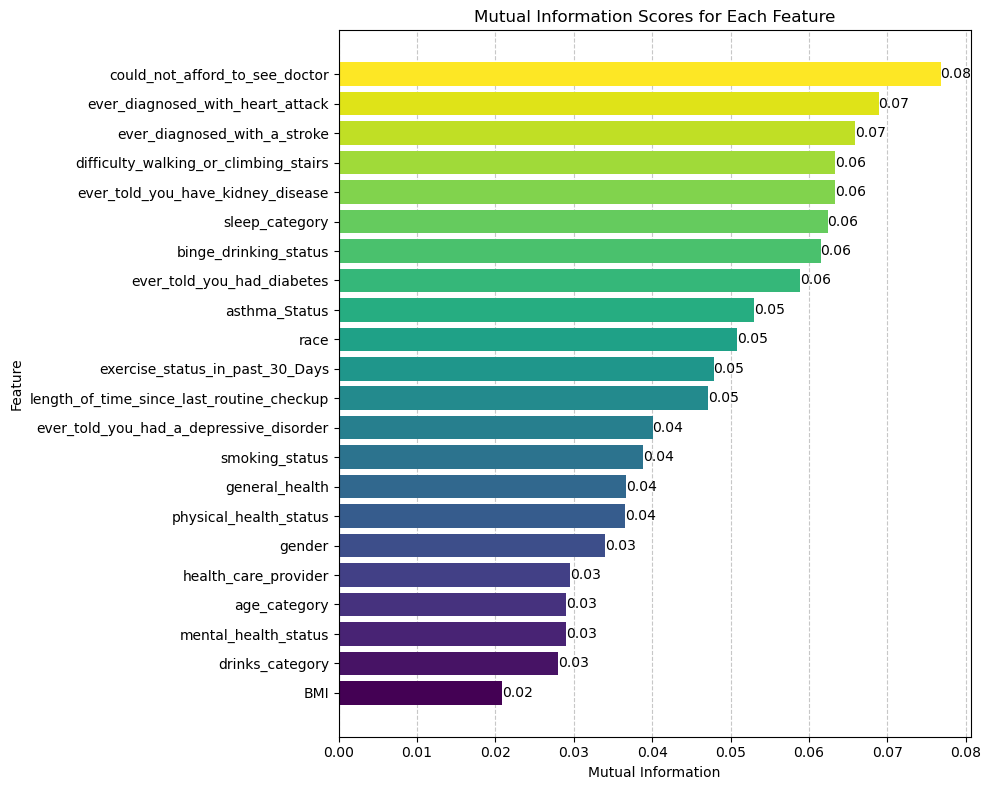

In [17]:
# Visualize mutual information scores as horizontal bar charts
plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(MI_score)))
bars = plt.barh(MI_score.index, MI_score.values, color=colors)

# Add grid lines behind the bars
plt.gca().set_axisbelow(True)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add titles and labels
plt.title('Mutual Information Scores for Each Feature')
plt.xlabel('Mutual Information')
plt.ylabel('Feature')

# Add data labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}',
             va='center', ha='left', color='black')

plt.tight_layout()
plt.show()

#### **Interpretation of Mutual Information Scores**<a id='Interpretation_of_Mutual_Information_Scores'></a>
[Contents](#Contents)


Mutual information measures the dependency between variables, capturing both linear and non-linear relationships. In this context, the mutual information score indicates how much information about the target variable heart_disease is provided by each feature. Higher scores imply stronger relationships between the feature and the target variable.

**Top Features with High Mutual Information Scores**
* could_not_afford_to_see_doctor (0.08):

This feature has the highest mutual information score, suggesting that the inability to afford to see a doctor is the most informative feature for predicting heart disease. This indicates a significant association between financial barriers to healthcare and the likelihood of having heart disease.
* ever_diagnosed_with_heart_attack (0.07):

Being previously diagnosed with a heart attack is highly informative for predicting heart disease. This is expected, as a history of heart attacks is a strong indicator of ongoing heart health issues.
* ever_diagnosed_with_a_stroke (0.07):

Similarly, a history of strokes is another strong predictor of heart disease, suggesting that individuals with a history of stroke are more likely to have heart disease.
* difficulty_walking_or_climbing_stairs (0.06):

Difficulty in physical activities like walking or climbing stairs is closely related to heart disease, likely reflecting the physical limitations caused by heart health issues.
* ever_told_you_have_kidney_disease (0.06):

Kidney disease is significantly associated with heart disease, which aligns with the known comorbidities between cardiovascular and renal health issues.
* sleep_category (0.06):

Sleep patterns or quality of sleep also show a notable relationship with heart disease, potentially indicating that poor sleep may be a risk factor.
* binge_drinking_status (0.06):

Binge drinking is another informative feature, suggesting a relationship between alcohol consumption behaviors and heart disease risk.
* ever_told_you_had_diabetes (0.06):

Diabetes is a well-known risk factor for heart disease, and its high mutual information score reflects this strong association.
* asthma_Status (0.05):

The presence of asthma also provides information about the likelihood of having heart disease, possibly due to shared risk factors or comorbid conditions.

**Features with Moderate Mutual Information Scores**
* race (0.05), exercise_status_in_past_30_Days (0.05), length_of_time_since_last_routine_checkup (0.05):

These features have moderate mutual information scores, indicating that they contribute useful but less substantial information about heart disease risk.
* ever_told_you_had_a_depressive_disorder (0.04), smoking_status (0.04), general_health (0.04), physical_health_status (0.04):

Mental health, smoking status, and general physical health also show meaningful associations with heart disease, reflecting the multifaceted nature of heart disease risk factors.

**Features with Lower Mutual Information Scores**
* gender (0.03), health_care_provider (0.03), age_category (0.03), mental_health_status (0.03), drinks_category (0.03), BMI (0.02):
These features have lower mutual information scores, suggesting that while they do provide some information, their individual contributions to predicting heart disease are relatively smaller compared to the top features.

**Summary**

The mutual information scores provide a quantitative measure of how much each feature contributes to predicting heart disease. Features like financial barriers to healthcare, history of heart attacks or strokes, and physical limitations have the highest scores, highlighting their strong associations with heart disease. Understanding these relationships can help in prioritizing features for further analysis and in developing predictive models for heart disease.

### **Pearson Correlation**<a id='Pearson_Correlation'></a>
[Contents](#Contents)

Pearson correlation, also known as Pearson's r, is a measure of the linear relationship between two continuous variables. It quantifies the degree to which a pair of variables are linearly related. The Pearson correlation coefficient can take values between -1 and 1, where:

* +1 indicates a perfect positive linear relationship.
* -1 indicates a perfect negative linear relationship.
* 0 indicates no linear relationship.

In [18]:
# Combine X_cbe (encoded features) and y (target) into a new DataFrame
encoded_df = X_cbe.copy()
encoded_df['heart_disease'] = y

corr = encoded_df.corr()

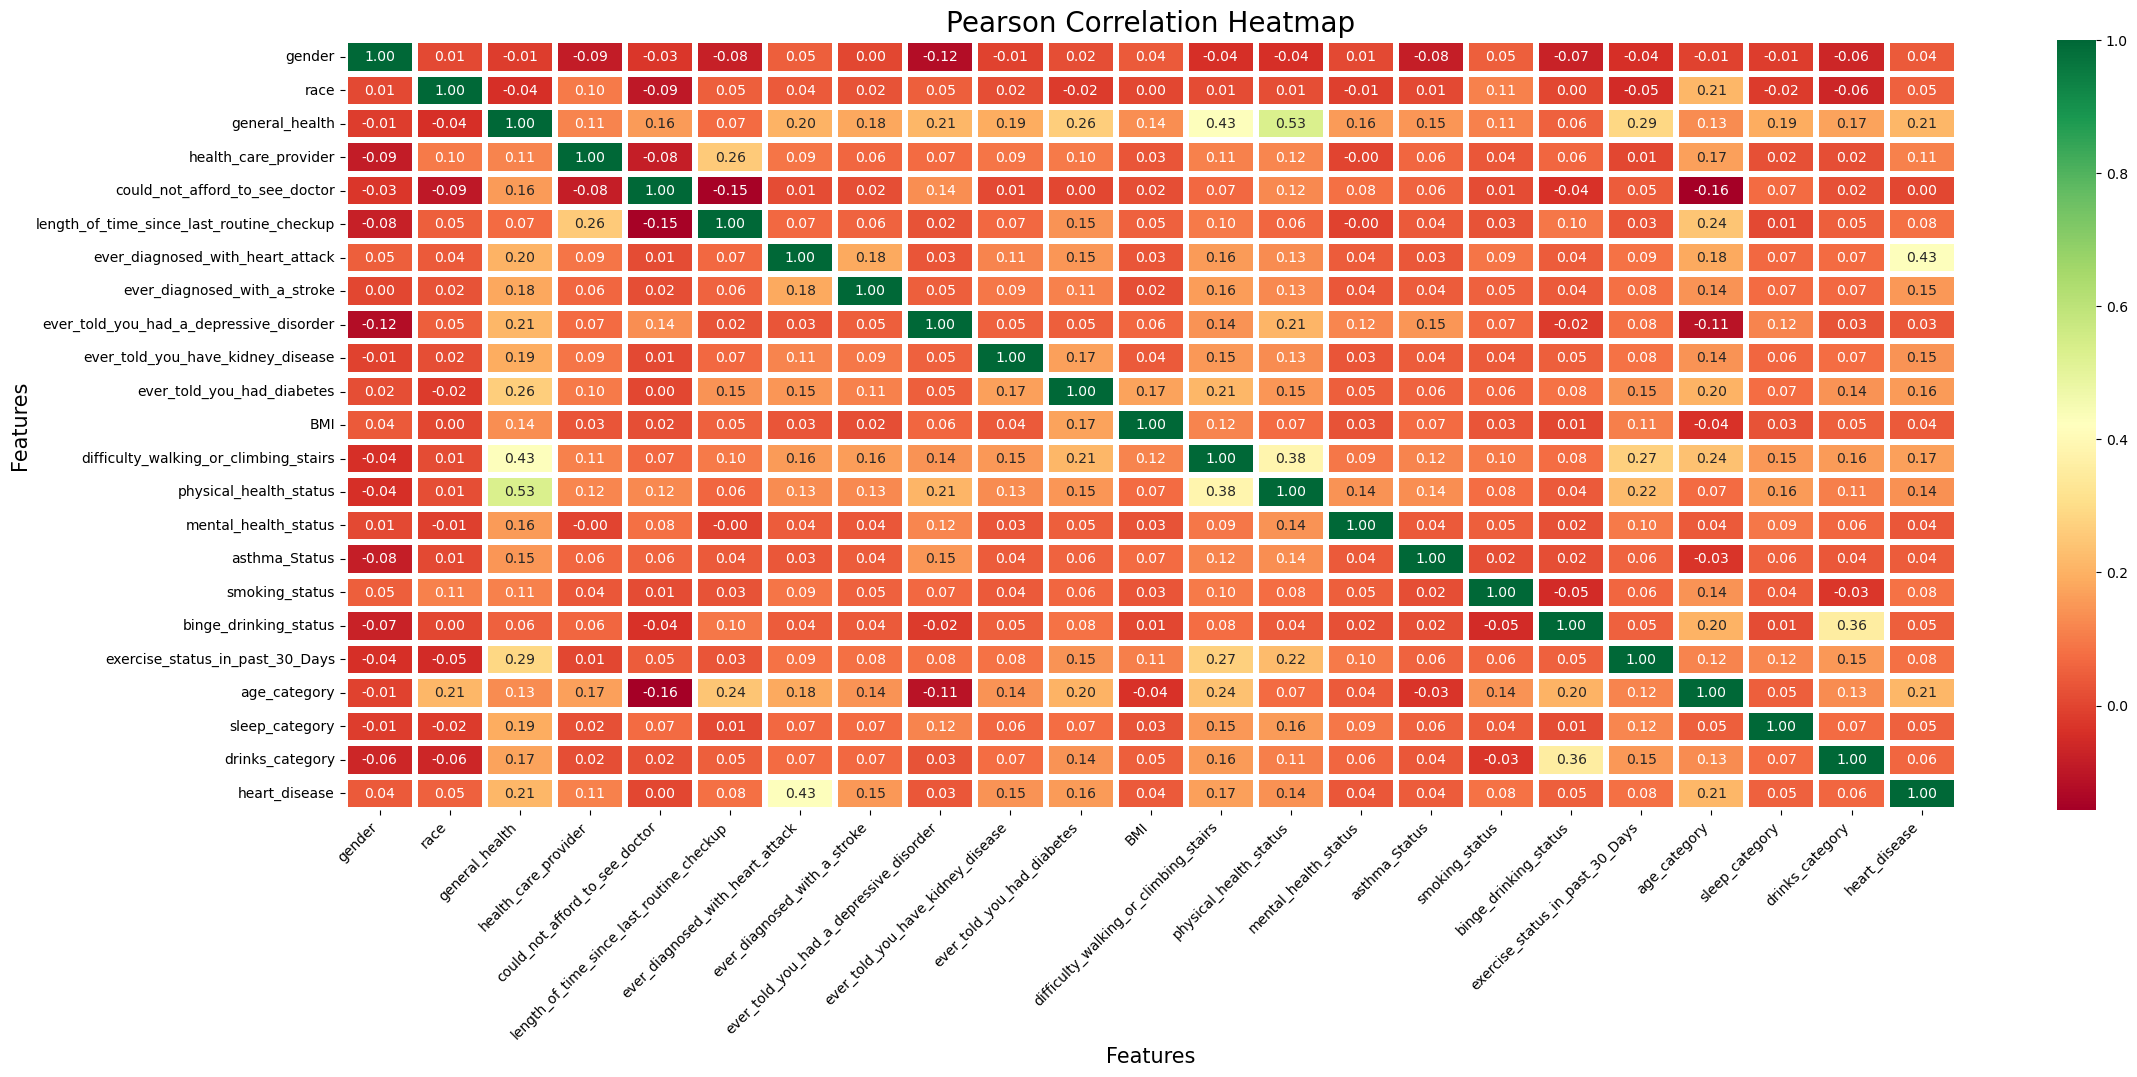

In [19]:
# Now, let's build a heatmap:

plt.figure(figsize=(26, 10))
sns.heatmap(corr, linewidths=4, annot=True, fmt=".2f", cmap="RdYlGn")
plt.title('Pearson Correlation Heatmap', fontsize=20)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
#plt.tight_layout()
plt.show()

#### **Collinearity Interpretation**<a id='Collinearity_Interpretation'></a>
[Contents](#Contents)

The heatmap displays the Pearson correlation coefficients between various features, focusing on identifying independent features that exhibit high collinearity with each other. Here are the key observations regarding collinearity:

**High Collinearity**
* General Health and Physical Health Status (0.53): There is a strong positive correlation between general health and physical health status. This suggests that these two features are closely related, with better general health strongly associated with better physical health status.
* Difficulty Walking or Climbing Stairs and Physical Health Status (0.43): A strong positive correlation indicates that difficulty in physical activities is a significant component of overall physical health.
* General Health and Difficulty Walking or Climbing Stairs (0.29): Moderate collinearity suggests that general health is significantly influenced by the ability to perform physical activities.
* Ever Told You Had Diabetes and General Health (0.26): Moderate collinearity suggests that diabetes status is an important factor in overall general health.
* Ever Told You Had Diabetes and Physical Health Status (0.26): Moderate collinearity indicates that diabetes has a considerable impact on physical health status.
* Length of Time Since Last Routine Checkup and General Health (0.26): Moderate collinearity suggests that routine checkups are related to overall health monitoring.
* General Health and Exercise Status in Past 30 Days (0.29): * Moderate collinearity suggests that exercise is an important factor in maintaining general health.

**Moderate Collinearity**
* Ever Diagnosed with Heart Attack and Ever Diagnosed with a Stroke (0.18): There is moderate collinearity, indicating that these conditions often occur together.
* Ever Told You Had Diabetes and Ever Diagnosed with Heart Attack (0.20): Moderate collinearity indicates a common comorbidity with heart disease.
* Ever Diagnosed with a Stroke and Ever Diagnosed with Heart Attack (0.18): Moderate collinearity indicating a common risk factor.
* Ever Told You Have Kidney Disease and Ever Told You Had Diabetes (0.19): Moderate collinearity suggests common comorbidities.
* Ever Diagnosed with Heart Attack and Ever Told You Had Kidney Disease (0.15): Moderate collinearity indicates a link between kidney disease and heart disease.
* Health Care Provider and General Health (0.26): Moderate collinearity indicates a link between having a healthcare provider and general health.
* Health Care Provider and Could Not Afford to See Doctor (0.16): Moderate collinearity suggests financial barriers to healthcare impact general health.
* Smoking Status and Binge Drinking Status (0.11): Weak collinearity suggests some lifestyle factors are related.


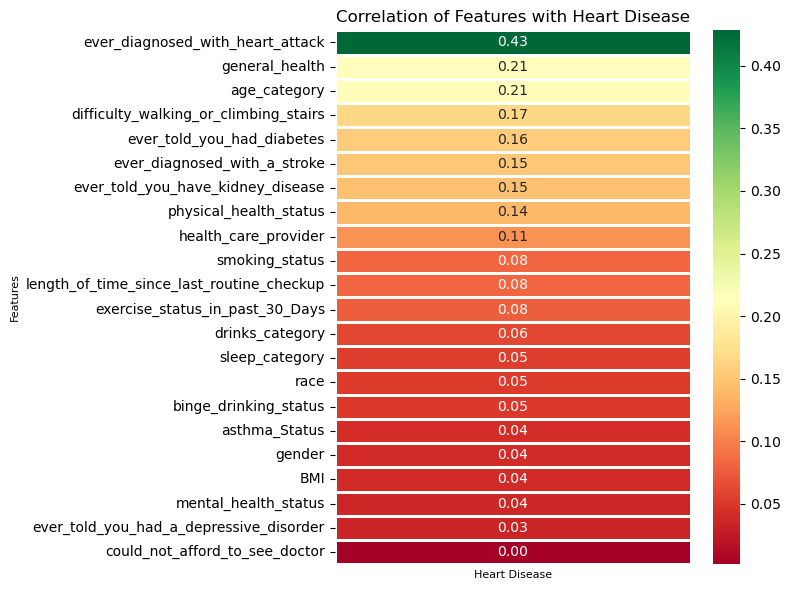

In [20]:
# Extract correlations with the target variable:
correlation_with_target = corr[['heart_disease']].drop(index='heart_disease').sort_values(by='heart_disease', ascending=False)

# Visualize the correlation with the target variable using a heatmap:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_target, annot=True, fmt=".2f", cmap="RdYlGn", cbar=True, linewidths=2)
plt.title('Correlation of Features with Heart Disease', fontsize=12)
plt.xlabel('Heart Disease', fontsize=8)
plt.ylabel('Features', fontsize=8)
plt.xticks(rotation=45, ha='right')
plt.xticks(ticks=[], labels=[], rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### **Target Variable Interpretation**<a id='Target_Variable_Interpretation'></a>
[Contents](#Contents)

The heatmap displays the Pearson correlation coefficients between various features and the target variable heart_disease. The values range from `-1` to `1`, where values closer to `1` indicate a strong positive linear correlation, values closer to `-1` indicate a strong negative linear correlation, and values around `0` indicate no linear correlation. Here are the key observations:

**Strongest Positive Linear Correlations**
* Ever Diagnosed with Heart Attack (0.43):
Interpretation: This feature has the highest positive linear correlation with heart disease, indicating that individuals who have had a heart attack are significantly more likely to have heart disease. This is a strong relationship and aligns with medical knowledge that a history of heart attacks is a major risk factor for heart disease.

**Moderate Positive Linear Correlations**
* General Health (0.21):
Interpretation: There is a moderate positive linear correlation between general health and heart disease. Poorer general health is associated with a higher likelihood of heart disease.
* Age Category (0.21):
Interpretation: Age category has a moderate positive linear correlation with heart disease, suggesting that older individuals are more likely to have heart disease.
* Difficulty Walking or Climbing Stairs (0.17):
Interpretation: This feature indicates that individuals who report difficulty with physical activities are more likely to have heart disease.
* Ever Told You Had Diabetes (0.16):
Interpretation: There is a moderate positive linear correlation, indicating that individuals with diabetes are more likely to have heart disease.
* Ever Diagnosed with a Stroke (0.15):
Interpretation: This feature has a moderate positive linear correlation with heart disease, suggesting that individuals who have had a stroke are also at higher risk for heart disease.
* Ever Told You Have Kidney Disease (0.15):
Interpretation: There is a moderate positive linear correlation, indicating a link between kidney disease and heart disease.
* Physical Health Status (0.14):
Interpretation: Individuals reporting poor physical health status are more likely to have heart disease.

**Weak Positive Linear Correlations**
* Health Care Provider (0.11):
Interpretation: A weak positive linear correlation, suggesting some association between having a healthcare provider and heart disease, potentially due to increased diagnosis rates.
* Smoking Status (0.08):
Interpretation: There is a weak positive linear correlation between smoking and heart disease, reflecting the known risk of smoking for cardiovascular conditions.
* Length of Time Since Last Routine Checkup (0.08):
Interpretation: A weak positive linear correlation suggests that longer intervals between checkups are slightly associated with heart disease.
* Exercise Status in Past 30 Days (0.08):
Interpretation: A weak positive linear correlation indicating that less frequent exercise might be associated with heart disease.
* Drinks Category (0.06):
Interpretation: There is a weak positive linear correlation between drinking status and heart disease.
* Sleep Category (0.05):
Interpretation: There is a weak positive linear correlation between sleep category and heart disease, suggesting that poor sleep might be associated with heart disease.
* Race (0.05):
Interpretation: A weak positive linear correlation indicating a slight association between race and heart disease.
* Binge Drinking Status (0.05):
Interpretation: A weak positive linear correlation between binge drinking and heart disease.
* Asthma Status (0.04):
Interpretation: A weak positive linear correlation between asthma status and heart disease.
* Gender (0.04):
Interpretation: A weak positive linear correlation between gender and heart disease.
* BMI (0.04):
Interpretation: A weak positive linear correlation between BMI and heart disease.
* Mental Health Status (0.04):
Interpretation: A weak positive linear correlation between mental health status and heart disease.
* Ever Told You Had a Depressive Disorder (0.03):
Interpretation: A weak positive linear correlation suggesting a slight association between depression and heart disease.
* Could Not Afford to See Doctor (0.00):
Interpretation: This feature has a negligible linear correlation with heart disease, indicating that financial barriers to healthcare do not have a significant direct linear correlation with heart disease in this dataset.

**Summary**
The heatmap reveals that the strongest predictor of heart disease is a history of heart attacks, followed by general health, age category, and difficulty with physical activities. Other features show weaker linear correlations, suggesting they have a less direct but still notable relationship with heart disease. These insights can be useful for identifying risk factors and guiding further analysis and modeling efforts.

### **Comparison Between Pearson Correlation and Mutual Information**<a id='Comparison_Between_Pearson_Correlation_and_Mutual_Information'></a>
[Contents](#Contents)

**Comparison**
* Linear Relationships: Pearson correlation is effective for identifying linear relationships. "Ever Diagnosed with Heart Attack" shows the highest linear correlation with heart disease, indicating a direct linear dependency.
* Non-Linear Relationships: Mutual information captures both linear and non-linear dependencies. "Could Not Afford to See Doctor" shows the highest score, suggesting that financial barriers, although not strongly linearly correlated, have a significant impact on heart disease prediction.
* Overlap: Some features like "Ever Diagnosed with Heart Attack" and "General Health" are significant in both Pearson correlation and mutual information, indicating their strong overall predictive power.
* Unique Insights: Mutual information highlights features like "Could Not Afford to See Doctor" and "Sleep Category" that Pearson correlation does not emphasize, suggesting these features have non-linear relationships with heart disease.

**Conclusion**
* Pearson correlation is useful for identifying strong linear relationships but might miss non-linear dependencies.
* Mutual information provides a more comprehensive view by capturing both linear and non-linear relationships, highlighting features that might not be evident with Pearson correlation alone.
* Using both methods provides a holistic understanding of the relationships between independent features and the target variable, aiding in better feature selection for predictive modeling.